In [1]:
from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

/home/qiaolinhan/anaconda3/envs/dev/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370117127/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
path = Path('dev/datasets')
path_img = path/'S_kaggle_wildfire'

path_label = path/'S_kaggle_wildfire_label'
codes = ['smoke', 'flame', 'Void']

In [3]:
path_img

Path('dev/datasets/S_kaggle_wildfire')

In [4]:
fnames = get_image_files(path_img)
print(fnames[0])

dev/datasets/S_kaggle_wildfire/000366.jpg


In [5]:
lbl_names = get_image_files(path_label)
print(lbl_names[0])

dev/datasets/S_kaggle_wildfire_label/label_000373.jpg


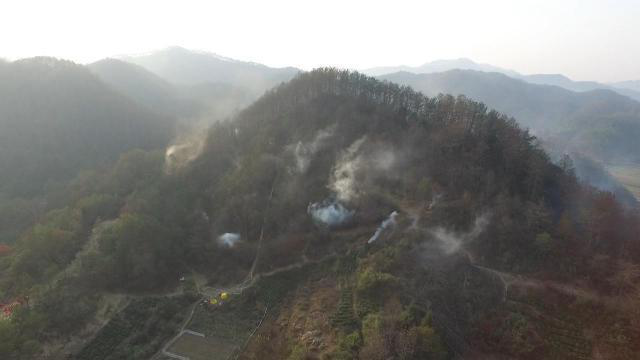

In [6]:
img = Image.open(fnames[0])
img.show()

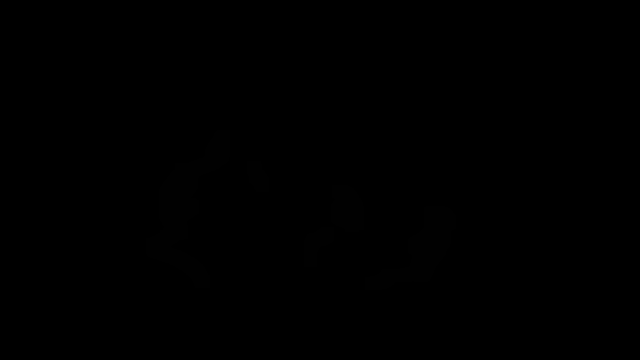

In [7]:
img = Image.open(lbl_names[0])
img.show()

In [8]:
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = False

In [9]:
dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((255, 255))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

In [10]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke


In [11]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True)

In [35]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [ ]:
learn.lr_find()

In [13]:
lr = 7.58e-5
learn.fit_one_cycle(13, slice(lr))

epoch,train_loss,valid_loss,acc_smoke,time
0,0.289464,0.248249,0.909905,00:33
1,0.185963,0.248808,0.890239,00:33
2,0.154467,0.186338,0.919106,00:33
3,0.150349,0.175401,0.918613,00:33
4,0.131554,0.159515,0.932044,00:33
5,0.118390,0.165364,0.931576,00:33
6,0.099639,0.142592,0.941093,00:33
7,0.098127,0.131726,0.943125,00:33
8,0.097108,0.132673,0.944915,00:34
9,0.084782,0.132784,0.944826,00:33


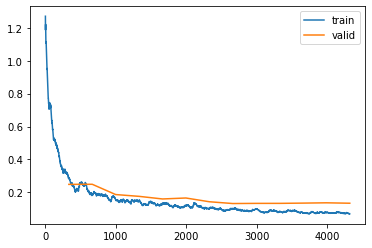

In [14]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [15]:
learn.save('stage-1')
learn.load('stage-1')

SuggestedLRs(valley=2.511886486900039e-05)

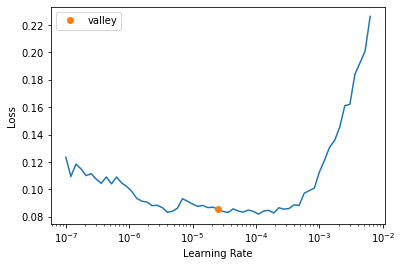

In [16]:
learn.unfreeze()
learn.lr_find()

In [17]:
lr_max = 6.3e-5

In [18]:
learn.fit_one_cycle(4, lr_max)

epoch,train_loss,valid_loss,acc_smoke,time
0,0.106644,0.140638,0.940660,00:39
1,0.103818,0.140980,0.943615,00:39
2,0.079005,0.124433,0.947679,00:39
3,0.076286,0.127162,0.948014,00:39


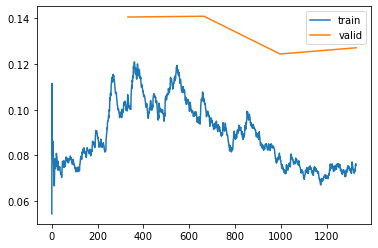

In [19]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
# learn.show_results()
# learn.save('attunet')

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

Path('datas/database/models/alunet.pth')

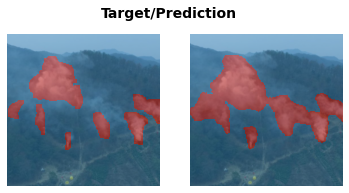

In [20]:
learn.show_results()
learn.save('alunet')

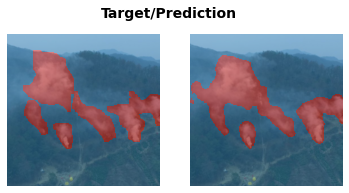

In [21]:
learn.show_results()

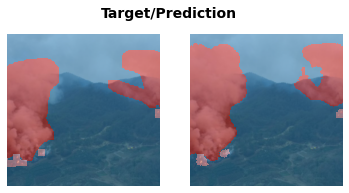

In [22]:
learn.show_results()

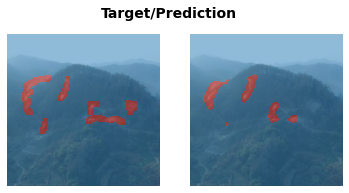

In [23]:
learn.show_results()

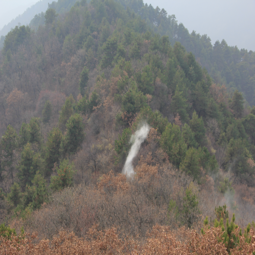

In [12]:
img = Image.open('dev/datasets/huangling/观景台拍摄/IMG_6934.JPG').resize((255, 255))
img.show()

In [13]:
img = PILImage(img)

In [14]:
learn.load('attunet')
# learn.load('attunet')

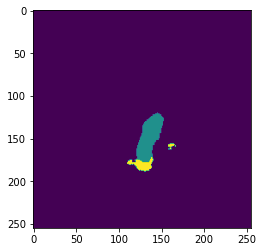

In [15]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

In [72]:
img = Image.open('dev/giao/datasets/bounding the masks/images/DJI_20211017111122_0003_Z_MP4_0.png').resize((255, 255))
img = PILImage(img)
img.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dev/giao/datasets/S_kaggle_wildfire/000012.jpeg'

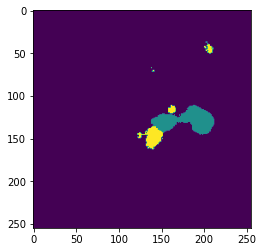

In [19]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

<AxesSubplot:>

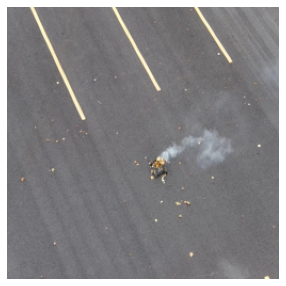

In [20]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention= False)

learn.load('alunet')

    img = Image.open('dev/giao/datasets/bounding the masks/images/DJI_20211017111122_0003_Z_MP4_0.png').resize((255, 255))
    img = PILImage(img)
    img.show()

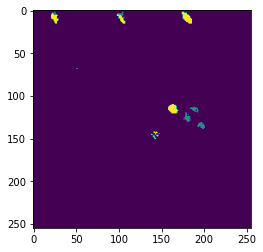

In [21]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

In [58]:
# test
# testing dependencies
import os
import cv2

from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from datetime import datetime
import pathlib

%matplotlib inline

In [59]:
path = Path('/home/qiao/dev/giao/datasets')
path_img = path/'S_kaggle_wildfire/'

path_label = path/'S_kaggle_wildfire_label/'
codes = ['Smoke', 'Flame', 'Void']

In [60]:
print('======> path_img', path_img)

======> path_img /home/qiao/dev/giao/datasets/S_kaggle_wildfire


In [61]:
fnames = get_image_files(path_img)
print(fnames[0])

lbl_names = get_image_files(path_label)
print(lbl_names[0])

/home/qiao/dev/giao/datasets/S_kaggle_wildfire/000366.jpg
/home/qiao/dev/giao/datasets/S_kaggle_wildfire_label/label_000373.jpg


In [62]:
# connections between images and masks
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = False

dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((400, 400))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [63]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [64]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True) # self_attention = False

In [65]:
learn.load('/home/qiao/dev/giao/datasets/bounding/params/attunet')
# learn.load('attunet')

In [66]:
# get the test image folder
test_path = '/home/qiao/dev/giao/datasets/m300_grabbed_data_1_17.1/rgb/'
test_fnames = get_image_files(test_path)
total_number = len(test_fnames)
# test whether successfully loaded
print(f'======> example name: {test_fnames[0]}')

======> example name: /home/qiao/dev/giao/datasets/m300_grabbed_data_1_17.1/rgb/60.png


In [67]:
# get the testing time
now = datetime.now()
date_time = now.strftime('%Y%m%d%H%M') # Y for year, m for month, d for day, H for hour, M for minute, S for second
print(f'======> The time: {date_time}')

======> The time: 202205271628


In [68]:
# build the folder to store predicted masks
test_pred_path = pathlib.Path(f"/home/qiao/dev/giao/datasets/bounding/pred_{date_time}" )
test_pred_path.mkdir(parents=True, exist_ok=True)

print(f'======> created the folder: {test_pred_path}')

======> created the folder: /home/qiao/dev/giao/datasets/bounding/pred_202205271628


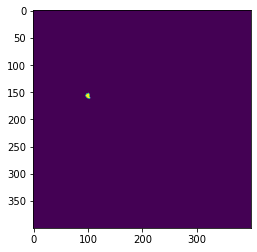

======> predicted mask of 60.png saved! (Counting [1]/424)


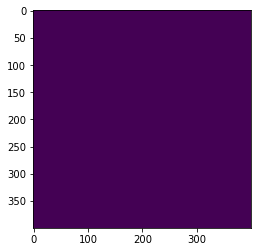

======> predicted mask of 230.png saved! (Counting [2]/424)


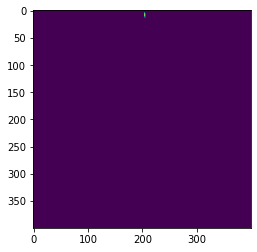

======> predicted mask of 151.png saved! (Counting [3]/424)


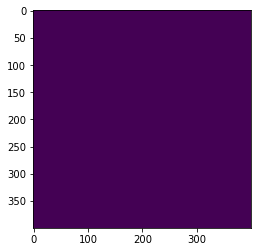

======> predicted mask of 83.png saved! (Counting [4]/424)


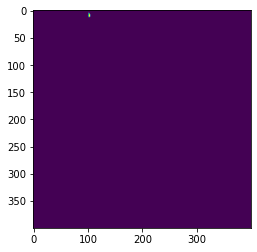

======> predicted mask of 384.png saved! (Counting [5]/424)


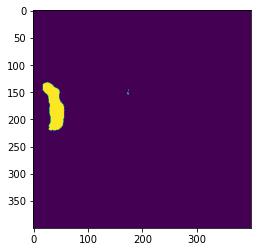

======> predicted mask of 43.png saved! (Counting [6]/424)


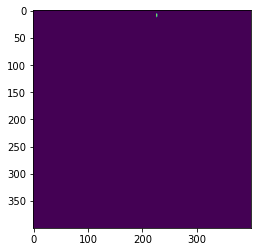

======> predicted mask of 158.png saved! (Counting [7]/424)


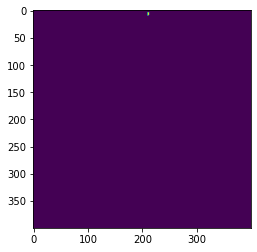

======> predicted mask of 4.png saved! (Counting [8]/424)


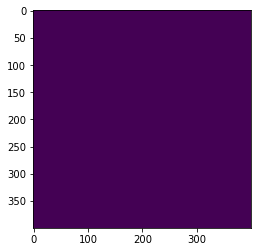

======> predicted mask of 340.png saved! (Counting [9]/424)


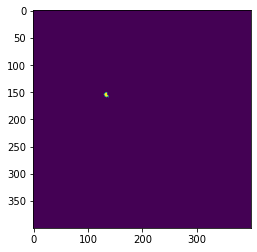

======> predicted mask of 84.png saved! (Counting [10]/424)


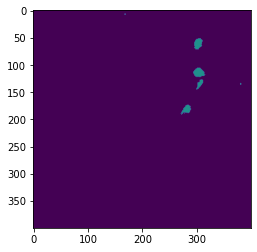

======> predicted mask of 141.png saved! (Counting [11]/424)


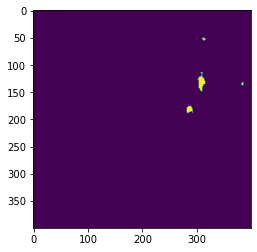

======> predicted mask of 142.png saved! (Counting [12]/424)


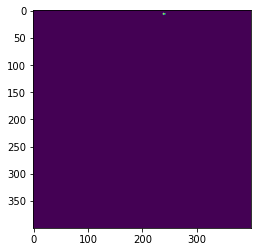

======> predicted mask of 163.png saved! (Counting [13]/424)


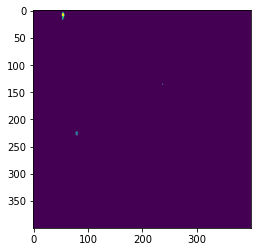

======> predicted mask of 292.png saved! (Counting [14]/424)


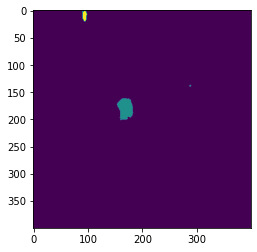

======> predicted mask of 24.png saved! (Counting [15]/424)


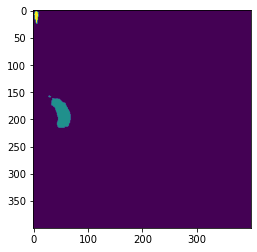

======> predicted mask of 40.png saved! (Counting [16]/424)


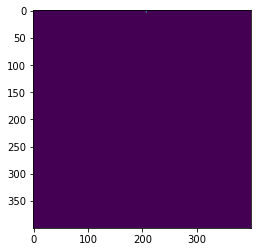

======> predicted mask of 209.png saved! (Counting [17]/424)


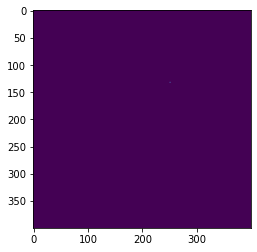

======> predicted mask of 288.png saved! (Counting [18]/424)


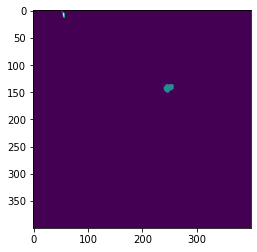

======> predicted mask of 113.png saved! (Counting [19]/424)


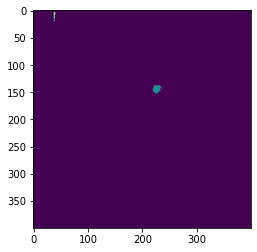

======> predicted mask of 106.png saved! (Counting [20]/424)


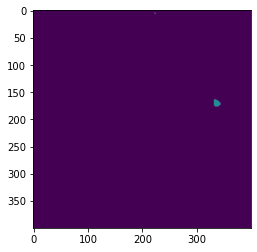

======> predicted mask of 0.png saved! (Counting [21]/424)


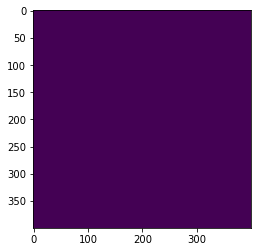

======> predicted mask of 78.png saved! (Counting [22]/424)


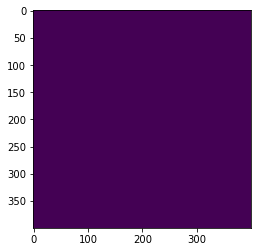

======> predicted mask of 389.png saved! (Counting [23]/424)


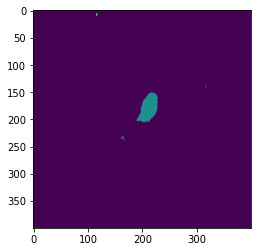

======> predicted mask of 128.png saved! (Counting [24]/424)


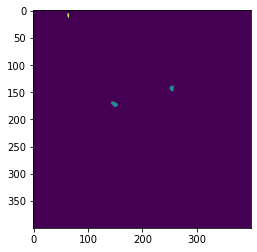

======> predicted mask of 115.png saved! (Counting [25]/424)


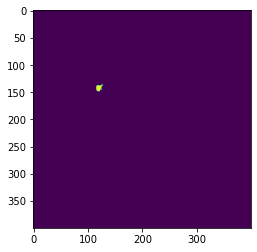

======> predicted mask of 353.png saved! (Counting [26]/424)


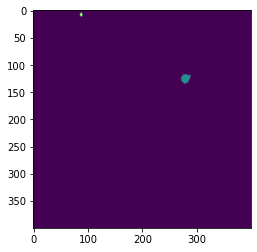

======> predicted mask of 278.png saved! (Counting [27]/424)


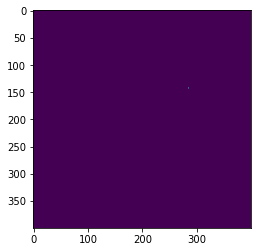

======> predicted mask of 123.png saved! (Counting [28]/424)


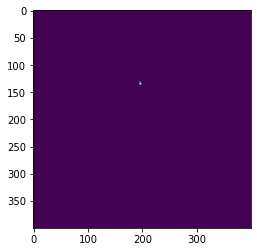

======> predicted mask of 366.png saved! (Counting [29]/424)


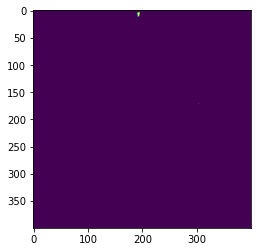

======> predicted mask of 7.png saved! (Counting [30]/424)


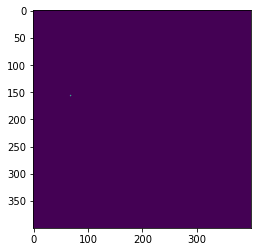

======> predicted mask of 333.png saved! (Counting [31]/424)


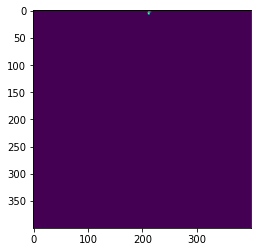

======> predicted mask of 206.png saved! (Counting [32]/424)


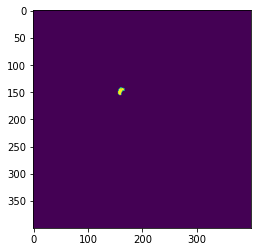

======> predicted mask of 88.png saved! (Counting [33]/424)


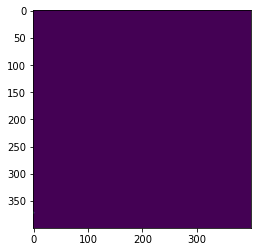

======> predicted mask of 416.png saved! (Counting [34]/424)


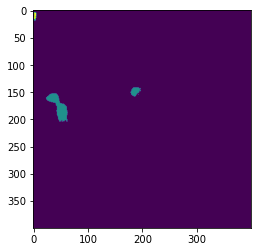

======> predicted mask of 41.png saved! (Counting [35]/424)


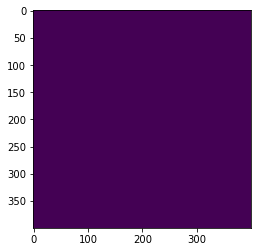

======> predicted mask of 105.png saved! (Counting [36]/424)


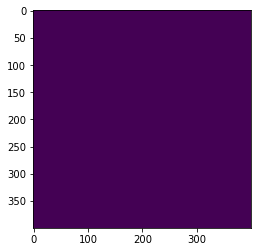

======> predicted mask of 420.png saved! (Counting [37]/424)


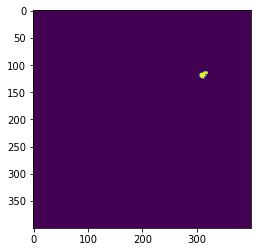

======> predicted mask of 263.png saved! (Counting [38]/424)


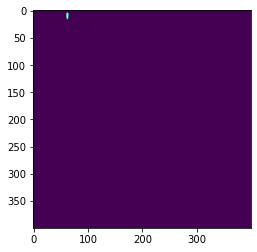

======> predicted mask of 290.png saved! (Counting [39]/424)


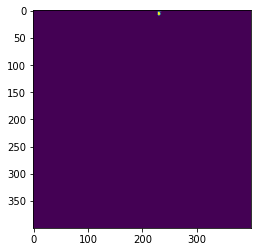

======> predicted mask of 197.png saved! (Counting [40]/424)


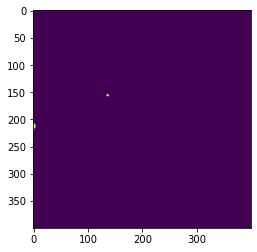

======> predicted mask of 317.png saved! (Counting [41]/424)


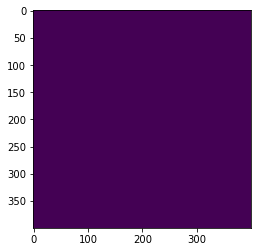

======> predicted mask of 218.png saved! (Counting [42]/424)


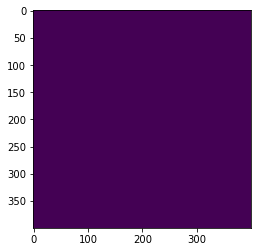

======> predicted mask of 260.png saved! (Counting [43]/424)


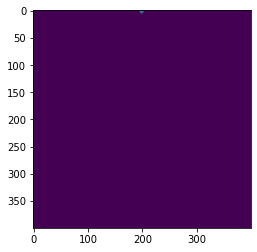

======> predicted mask of 214.png saved! (Counting [44]/424)


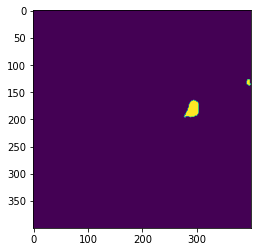

======> predicted mask of 144.png saved! (Counting [45]/424)


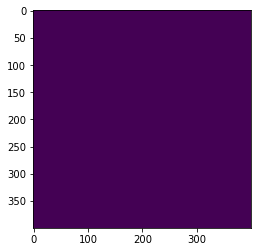

======> predicted mask of 240.png saved! (Counting [46]/424)


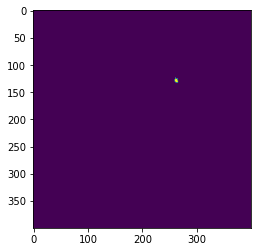

======> predicted mask of 377.png saved! (Counting [47]/424)


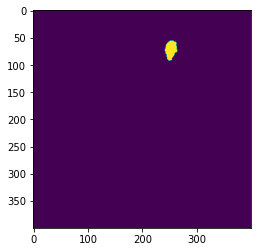

======> predicted mask of 135.png saved! (Counting [48]/424)


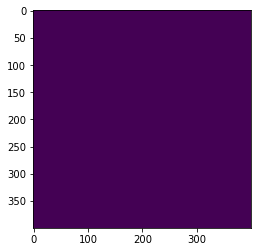

======> predicted mask of 255.png saved! (Counting [49]/424)


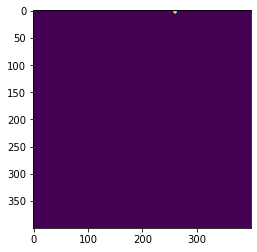

======> predicted mask of 409.png saved! (Counting [50]/424)


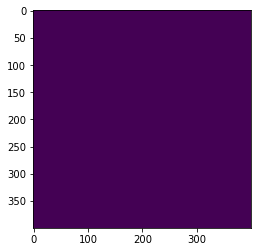

======> predicted mask of 300.png saved! (Counting [51]/424)


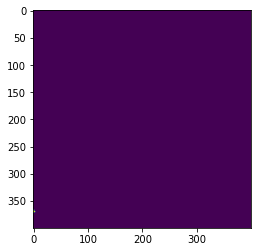

======> predicted mask of 417.png saved! (Counting [52]/424)


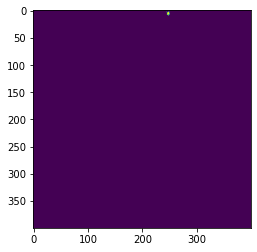

======> predicted mask of 186.png saved! (Counting [53]/424)


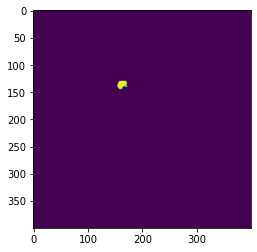

======> predicted mask of 359.png saved! (Counting [54]/424)


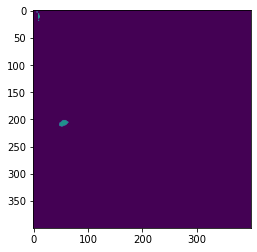

======> predicted mask of 95.png saved! (Counting [55]/424)


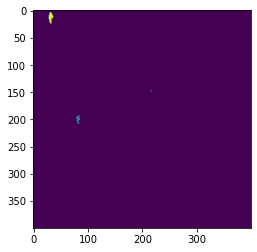

======> predicted mask of 33.png saved! (Counting [56]/424)


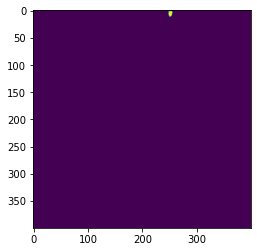

======> predicted mask of 182.png saved! (Counting [57]/424)


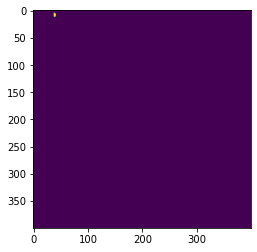

======> predicted mask of 369.png saved! (Counting [58]/424)


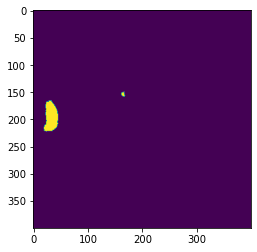

======> predicted mask of 45.png saved! (Counting [59]/424)


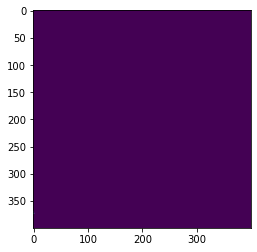

======> predicted mask of 421.png saved! (Counting [60]/424)


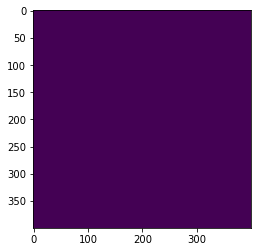

======> predicted mask of 360.png saved! (Counting [61]/424)


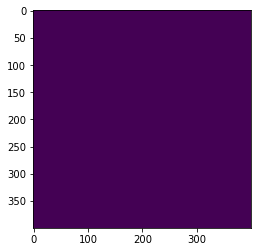

======> predicted mask of 398.png saved! (Counting [62]/424)


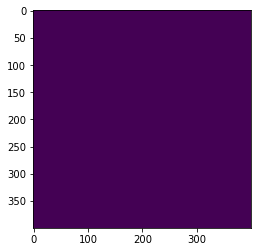

======> predicted mask of 334.png saved! (Counting [63]/424)


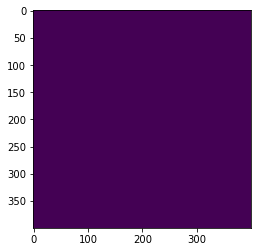

======> predicted mask of 246.png saved! (Counting [64]/424)


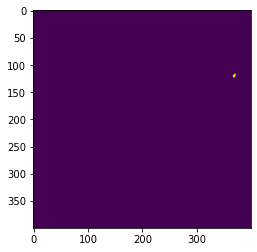

======> predicted mask of 393.png saved! (Counting [65]/424)


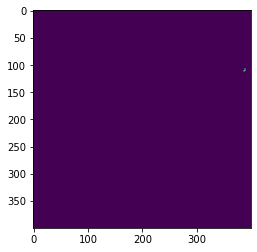

======> predicted mask of 228.png saved! (Counting [66]/424)


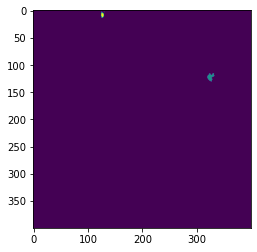

======> predicted mask of 388.png saved! (Counting [67]/424)


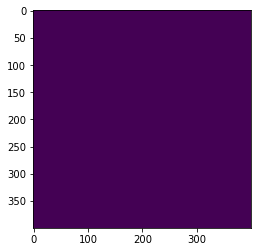

======> predicted mask of 241.png saved! (Counting [68]/424)


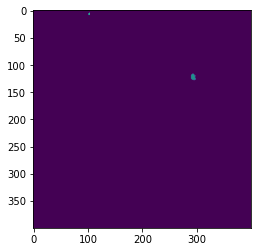

======> predicted mask of 269.png saved! (Counting [69]/424)


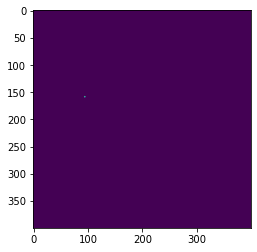

======> predicted mask of 327.png saved! (Counting [70]/424)


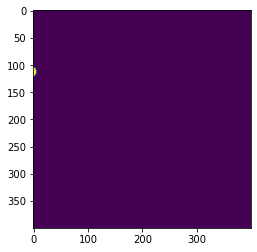

======> predicted mask of 68.png saved! (Counting [71]/424)


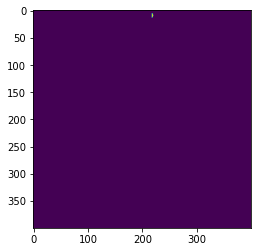

======> predicted mask of 156.png saved! (Counting [72]/424)


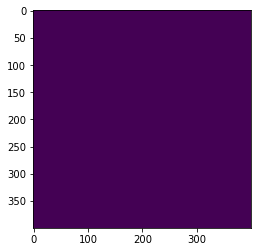

======> predicted mask of 402.png saved! (Counting [73]/424)


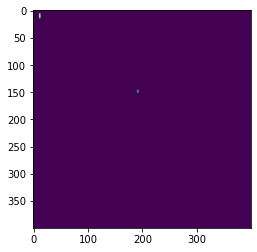

======> predicted mask of 96.png saved! (Counting [74]/424)


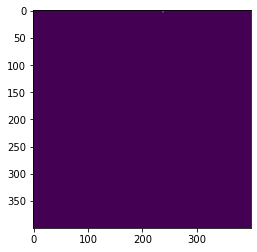

======> predicted mask of 404.png saved! (Counting [75]/424)


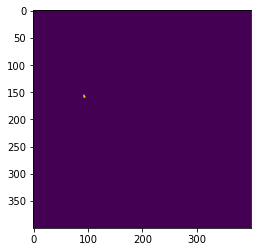

======> predicted mask of 66.png saved! (Counting [76]/424)


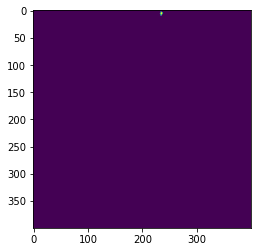

======> predicted mask of 195.png saved! (Counting [77]/424)


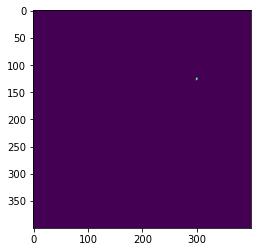

======> predicted mask of 385.png saved! (Counting [78]/424)


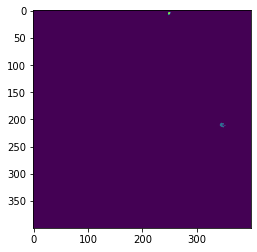

======> predicted mask of 185.png saved! (Counting [79]/424)


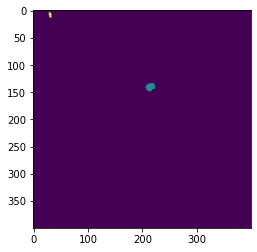

======> predicted mask of 302.png saved! (Counting [80]/424)


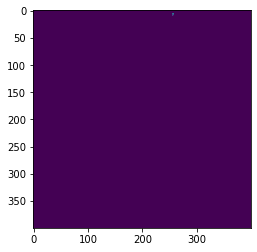

======> predicted mask of 175.png saved! (Counting [81]/424)


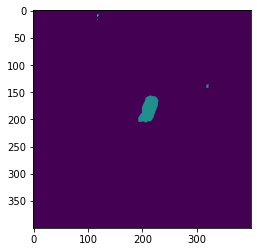

======> predicted mask of 129.png saved! (Counting [82]/424)


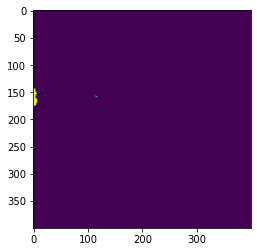

======> predicted mask of 53.png saved! (Counting [83]/424)


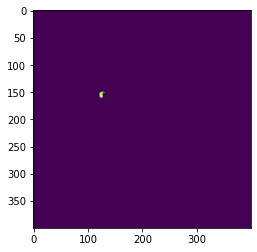

======> predicted mask of 82.png saved! (Counting [84]/424)


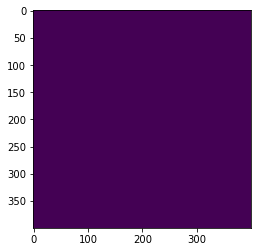

======> predicted mask of 57.png saved! (Counting [85]/424)


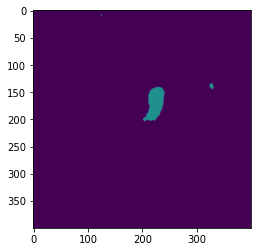

======> predicted mask of 130.png saved! (Counting [86]/424)


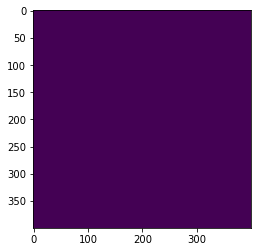

======> predicted mask of 350.png saved! (Counting [87]/424)


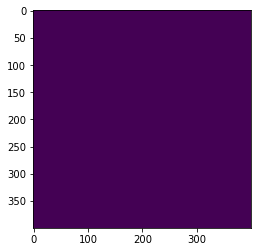

======> predicted mask of 310.png saved! (Counting [88]/424)


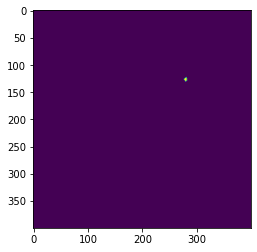

======> predicted mask of 381.png saved! (Counting [89]/424)


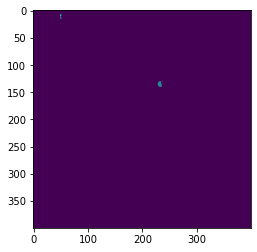

======> predicted mask of 293.png saved! (Counting [90]/424)


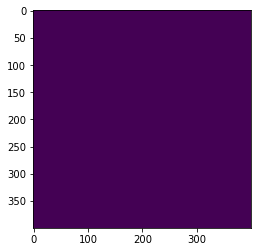

======> predicted mask of 211.png saved! (Counting [91]/424)


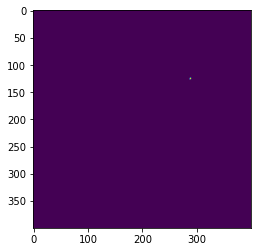

======> predicted mask of 271.png saved! (Counting [92]/424)


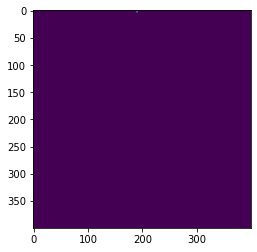

======> predicted mask of 222.png saved! (Counting [93]/424)


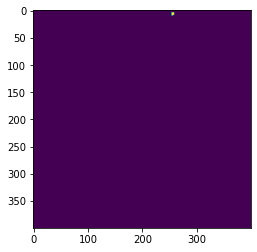

======> predicted mask of 176.png saved! (Counting [94]/424)


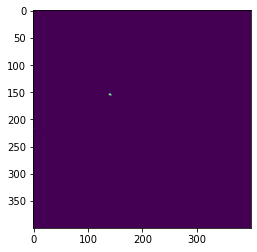

======> predicted mask of 316.png saved! (Counting [95]/424)


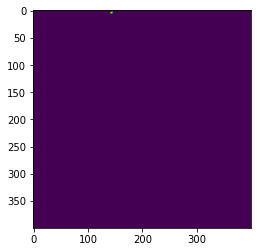

======> predicted mask of 248.png saved! (Counting [96]/424)


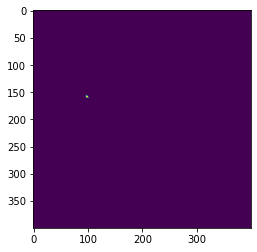

======> predicted mask of 76.png saved! (Counting [97]/424)


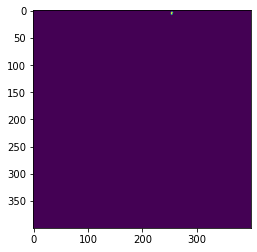

======> predicted mask of 178.png saved! (Counting [98]/424)


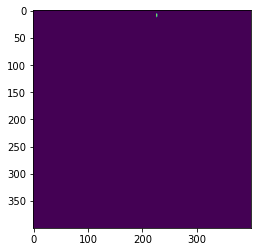

======> predicted mask of 159.png saved! (Counting [99]/424)


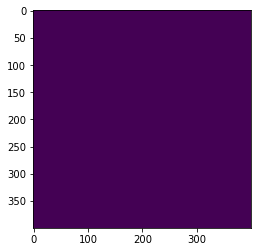

======> predicted mask of 299.png saved! (Counting [100]/424)


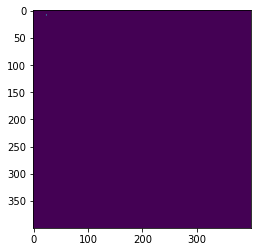

======> predicted mask of 305.png saved! (Counting [101]/424)


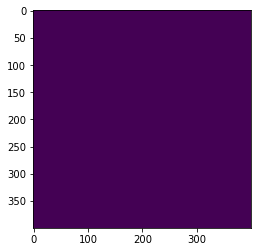

======> predicted mask of 399.png saved! (Counting [102]/424)


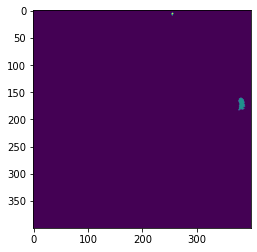

======> predicted mask of 169.png saved! (Counting [103]/424)


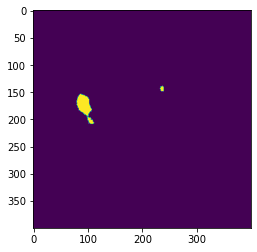

======> predicted mask of 30.png saved! (Counting [104]/424)


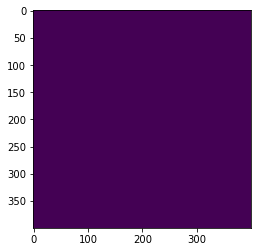

======> predicted mask of 392.png saved! (Counting [105]/424)


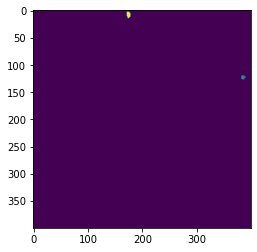

======> predicted mask of 11.png saved! (Counting [106]/424)


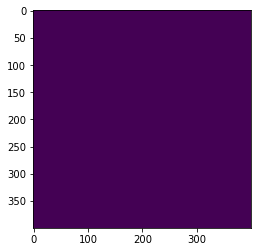

======> predicted mask of 192.png saved! (Counting [107]/424)


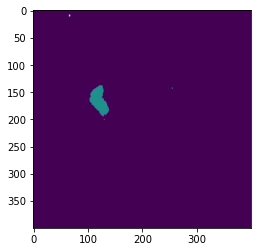

======> predicted mask of 27.png saved! (Counting [108]/424)


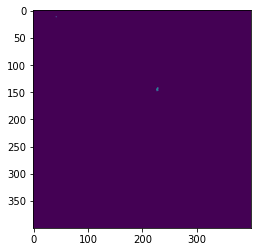

======> predicted mask of 108.png saved! (Counting [109]/424)


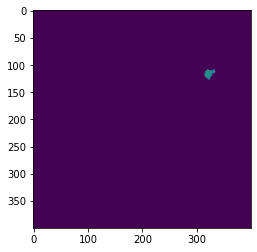

======> predicted mask of 258.png saved! (Counting [110]/424)


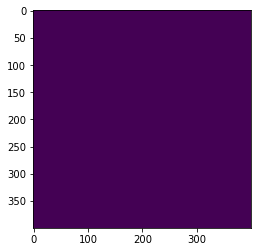

======> predicted mask of 394.png saved! (Counting [111]/424)


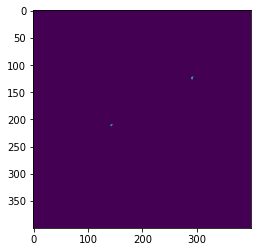

======> predicted mask of 270.png saved! (Counting [112]/424)


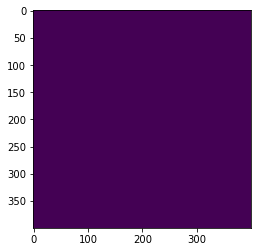

======> predicted mask of 337.png saved! (Counting [113]/424)


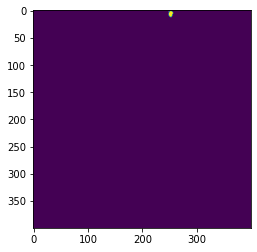

======> predicted mask of 181.png saved! (Counting [114]/424)


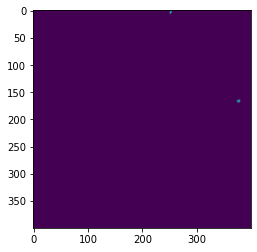

======> predicted mask of 406.png saved! (Counting [115]/424)


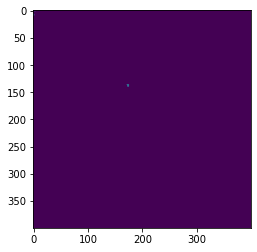

======> predicted mask of 362.png saved! (Counting [116]/424)


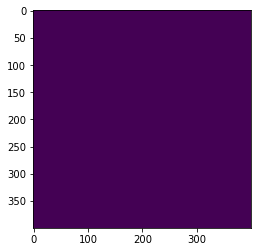

======> predicted mask of 339.png saved! (Counting [117]/424)


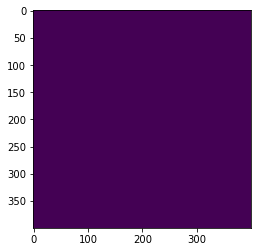

======> predicted mask of 330.png saved! (Counting [118]/424)


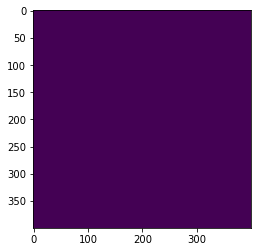

======> predicted mask of 264.png saved! (Counting [119]/424)


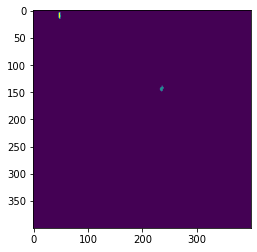

======> predicted mask of 110.png saved! (Counting [120]/424)


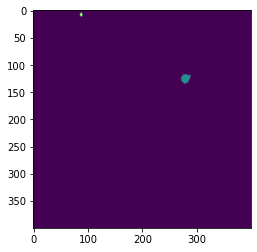

======> predicted mask of 277.png saved! (Counting [121]/424)


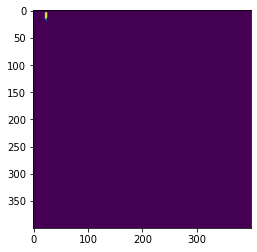

======> predicted mask of 101.png saved! (Counting [122]/424)


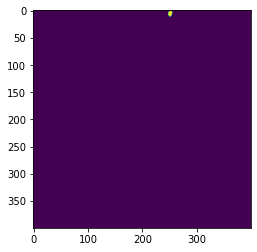

======> predicted mask of 183.png saved! (Counting [123]/424)


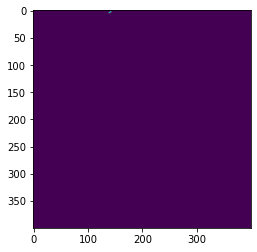

======> predicted mask of 250.png saved! (Counting [124]/424)


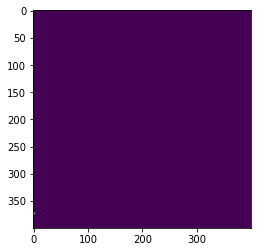

======> predicted mask of 415.png saved! (Counting [125]/424)


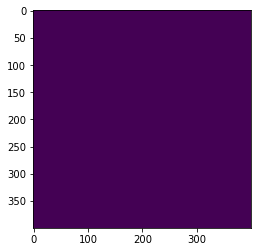

======> predicted mask of 220.png saved! (Counting [126]/424)


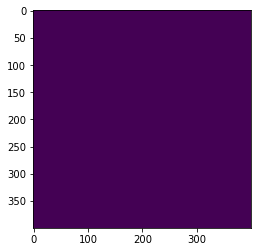

======> predicted mask of 390.png saved! (Counting [127]/424)


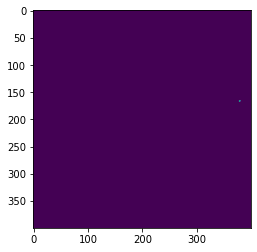

======> predicted mask of 407.png saved! (Counting [128]/424)


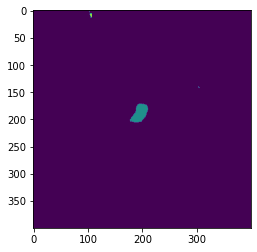

======> predicted mask of 126.png saved! (Counting [129]/424)


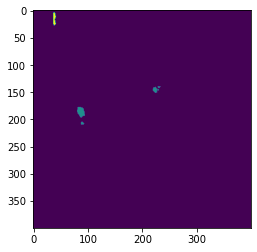

======> predicted mask of 32.png saved! (Counting [130]/424)


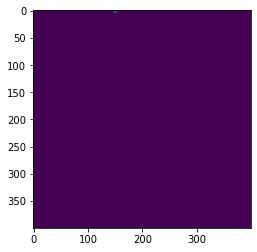

======> predicted mask of 245.png saved! (Counting [131]/424)


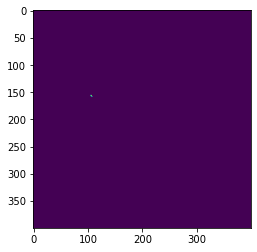

======> predicted mask of 56.png saved! (Counting [132]/424)


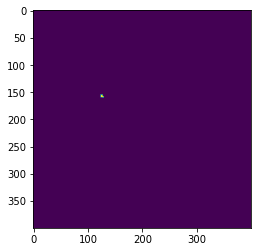

======> predicted mask of 320.png saved! (Counting [133]/424)


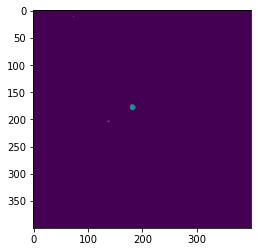

======> predicted mask of 118.png saved! (Counting [134]/424)


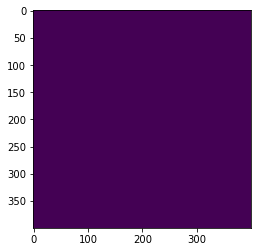

======> predicted mask of 328.png saved! (Counting [135]/424)


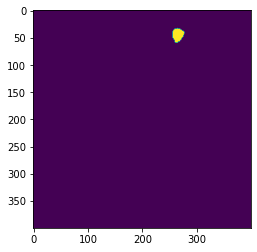

======> predicted mask of 136.png saved! (Counting [136]/424)


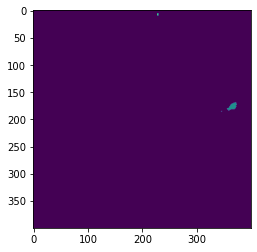

======> predicted mask of 160.png saved! (Counting [137]/424)


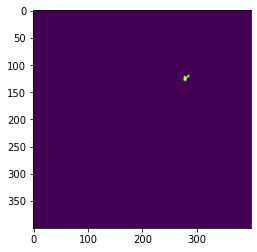

======> predicted mask of 276.png saved! (Counting [138]/424)


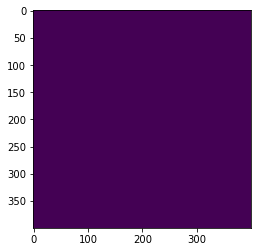

======> predicted mask of 397.png saved! (Counting [139]/424)


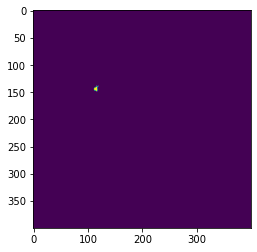

======> predicted mask of 352.png saved! (Counting [140]/424)


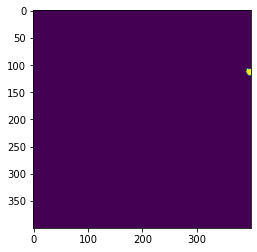

======> predicted mask of 223.png saved! (Counting [141]/424)


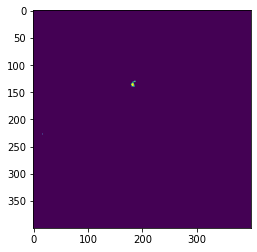

======> predicted mask of 363.png saved! (Counting [142]/424)


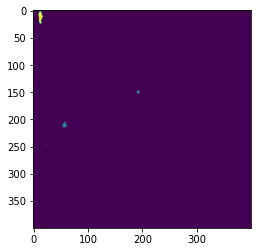

======> predicted mask of 38.png saved! (Counting [143]/424)


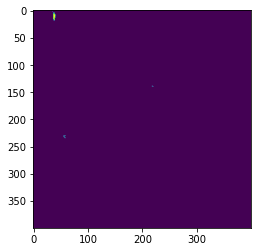

======> predicted mask of 298.png saved! (Counting [144]/424)


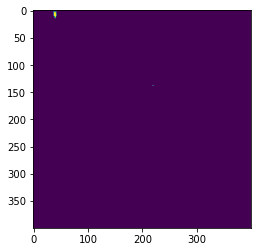

======> predicted mask of 297.png saved! (Counting [145]/424)


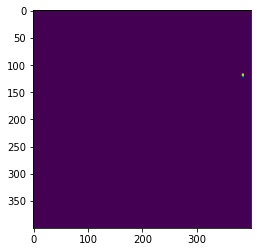

======> predicted mask of 395.png saved! (Counting [146]/424)


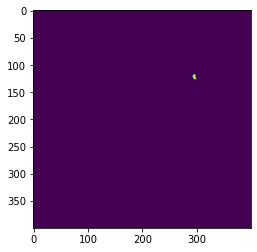

======> predicted mask of 268.png saved! (Counting [147]/424)


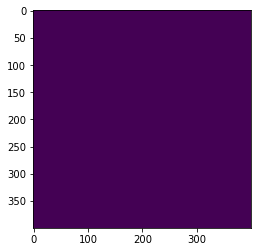

======> predicted mask of 251.png saved! (Counting [148]/424)


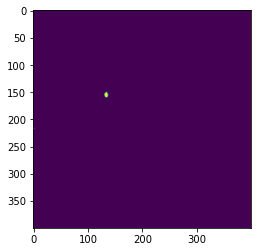

======> predicted mask of 318.png saved! (Counting [149]/424)


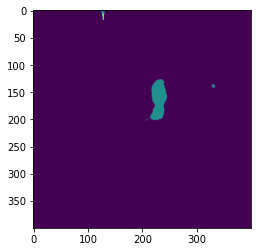

======> predicted mask of 131.png saved! (Counting [150]/424)


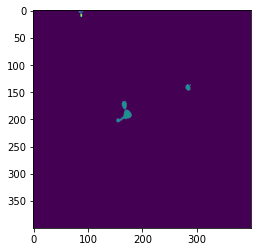

======> predicted mask of 122.png saved! (Counting [151]/424)


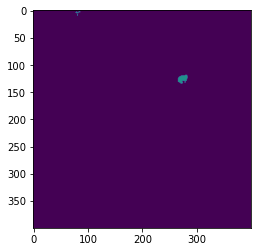

======> predicted mask of 281.png saved! (Counting [152]/424)


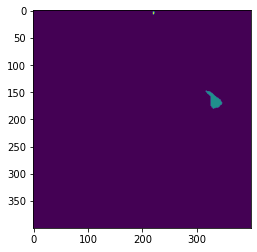

======> predicted mask of 2.png saved! (Counting [153]/424)


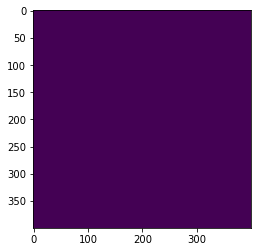

======> predicted mask of 62.png saved! (Counting [154]/424)


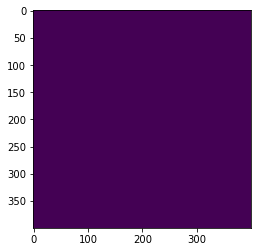

======> predicted mask of 342.png saved! (Counting [155]/424)


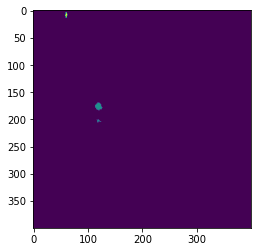

======> predicted mask of 28.png saved! (Counting [156]/424)


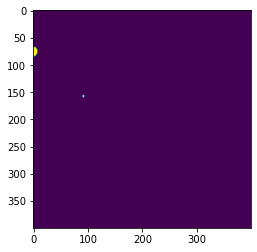

======> predicted mask of 71.png saved! (Counting [157]/424)


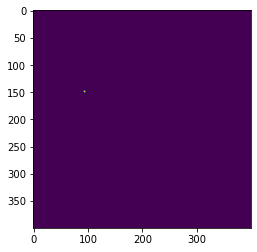

======> predicted mask of 348.png saved! (Counting [158]/424)


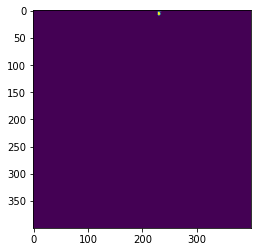

======> predicted mask of 198.png saved! (Counting [159]/424)


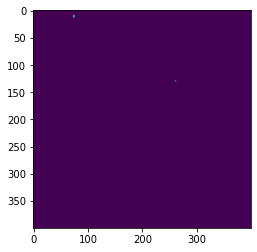

======> predicted mask of 285.png saved! (Counting [160]/424)


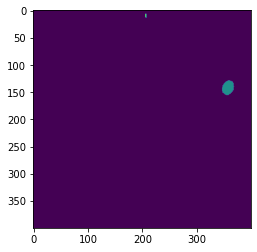

======> predicted mask of 152.png saved! (Counting [161]/424)


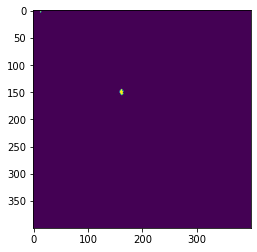

======> predicted mask of 89.png saved! (Counting [162]/424)


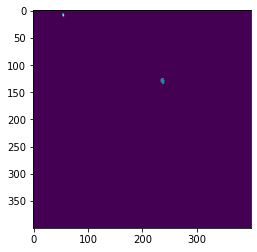

======> predicted mask of 372.png saved! (Counting [163]/424)


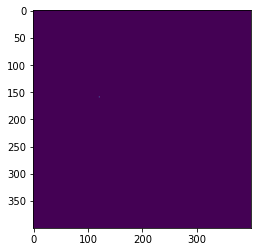

======> predicted mask of 321.png saved! (Counting [164]/424)


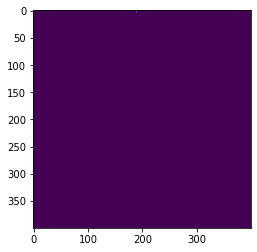

======> predicted mask of 221.png saved! (Counting [165]/424)


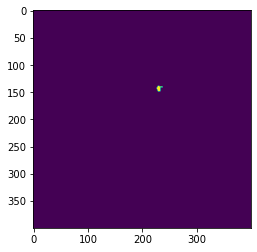

======> predicted mask of 109.png saved! (Counting [166]/424)


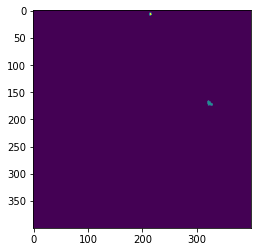

======> predicted mask of 3.png saved! (Counting [167]/424)


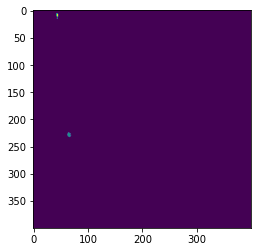

======> predicted mask of 296.png saved! (Counting [168]/424)


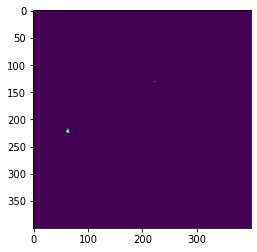

======> predicted mask of 370.png saved! (Counting [169]/424)


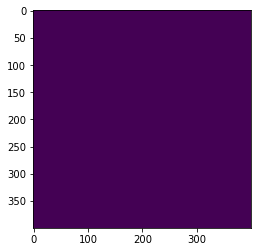

======> predicted mask of 125.png saved! (Counting [170]/424)


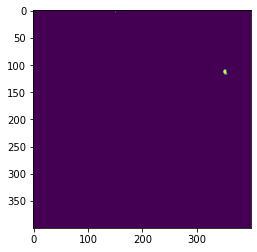

======> predicted mask of 244.png saved! (Counting [171]/424)


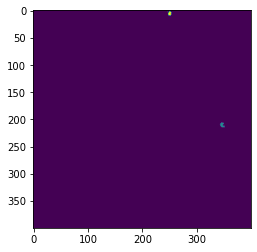

======> predicted mask of 184.png saved! (Counting [172]/424)


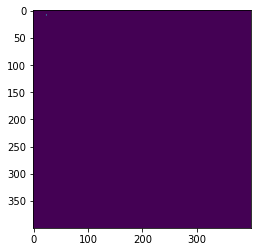

======> predicted mask of 304.png saved! (Counting [173]/424)


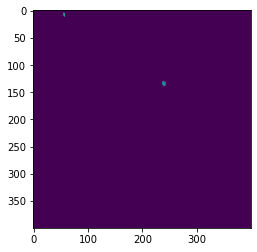

======> predicted mask of 291.png saved! (Counting [174]/424)


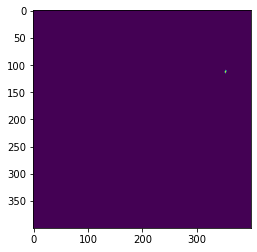

======> predicted mask of 243.png saved! (Counting [175]/424)


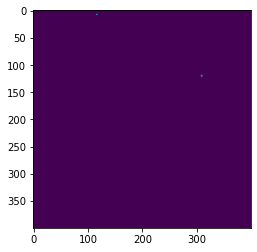

======> predicted mask of 262.png saved! (Counting [176]/424)


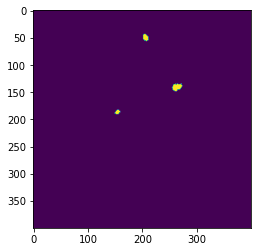

======> predicted mask of 116.png saved! (Counting [177]/424)


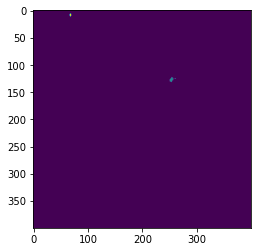

======> predicted mask of 375.png saved! (Counting [178]/424)


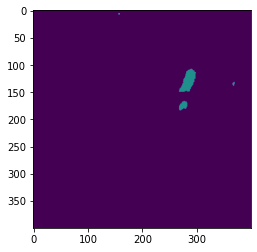

======> predicted mask of 138.png saved! (Counting [179]/424)


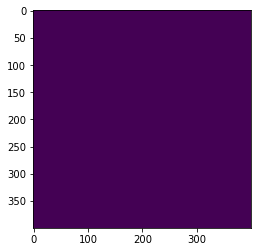

======> predicted mask of 401.png saved! (Counting [180]/424)


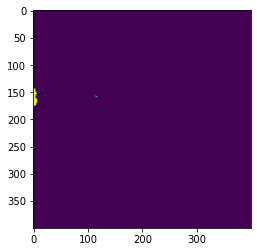

======> predicted mask of 54.png saved! (Counting [181]/424)


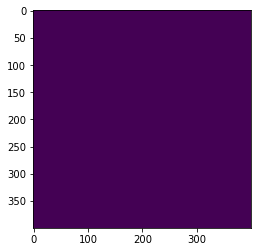

======> predicted mask of 102.png saved! (Counting [182]/424)


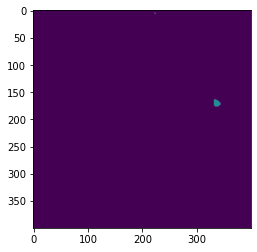

======> predicted mask of 1.png saved! (Counting [183]/424)


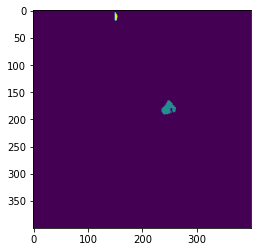

======> predicted mask of 15.png saved! (Counting [184]/424)


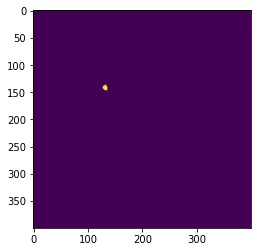

======> predicted mask of 355.png saved! (Counting [185]/424)


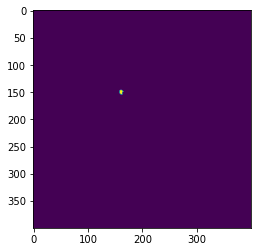

======> predicted mask of 312.png saved! (Counting [186]/424)


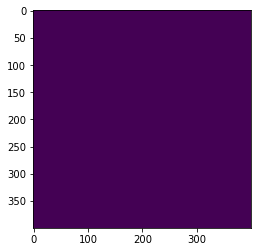

======> predicted mask of 227.png saved! (Counting [187]/424)


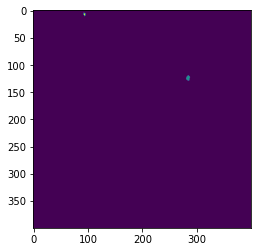

======> predicted mask of 274.png saved! (Counting [188]/424)


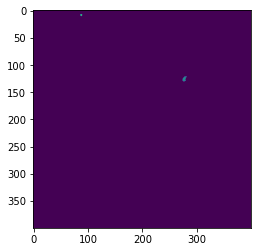

======> predicted mask of 380.png saved! (Counting [189]/424)


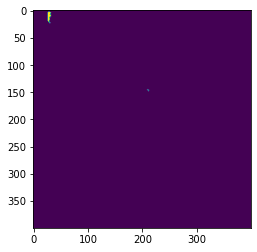

======> predicted mask of 103.png saved! (Counting [190]/424)


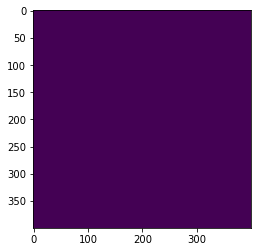

======> predicted mask of 410.png saved! (Counting [191]/424)


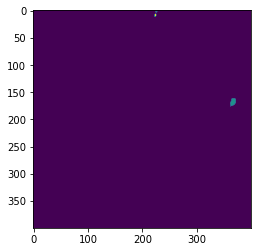

======> predicted mask of 157.png saved! (Counting [192]/424)


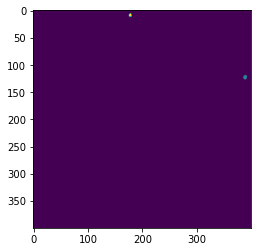

======> predicted mask of 10.png saved! (Counting [193]/424)


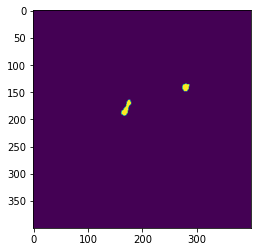

======> predicted mask of 121.png saved! (Counting [194]/424)


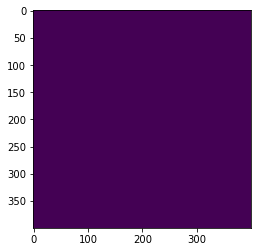

======> predicted mask of 324.png saved! (Counting [195]/424)


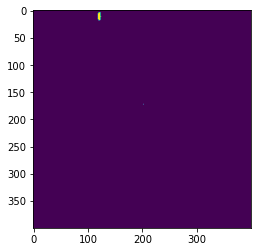

======> predicted mask of 19.png saved! (Counting [196]/424)


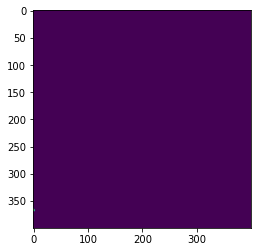

======> predicted mask of 419.png saved! (Counting [197]/424)


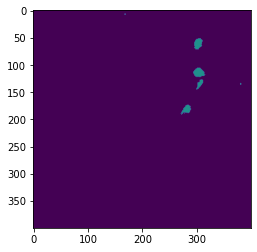

======> predicted mask of 140.png saved! (Counting [198]/424)


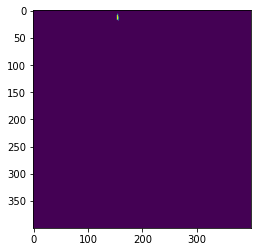

======> predicted mask of 14.png saved! (Counting [199]/424)


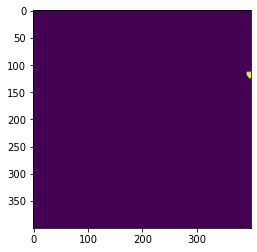

======> predicted mask of 396.png saved! (Counting [200]/424)


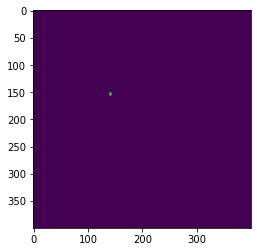

======> predicted mask of 85.png saved! (Counting [201]/424)


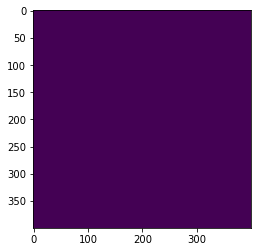

======> predicted mask of 155.png saved! (Counting [202]/424)


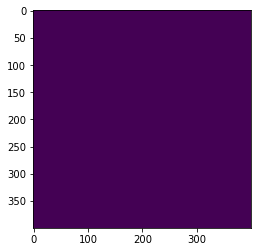

======> predicted mask of 67.png saved! (Counting [203]/424)


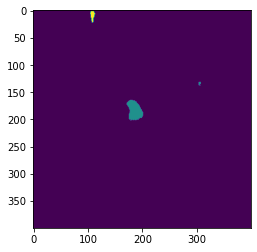

======> predicted mask of 22.png saved! (Counting [204]/424)


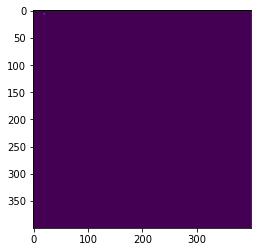

======> predicted mask of 100.png saved! (Counting [205]/424)


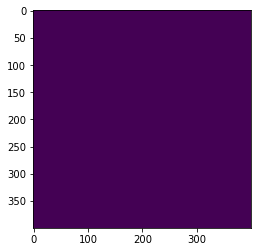

======> predicted mask of 146.png saved! (Counting [206]/424)


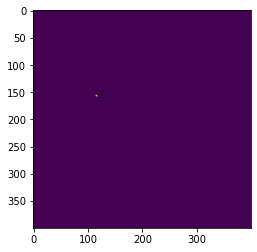

======> predicted mask of 81.png saved! (Counting [207]/424)


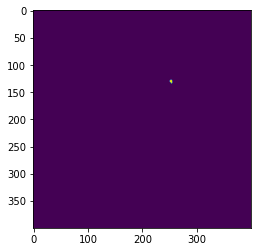

======> predicted mask of 287.png saved! (Counting [208]/424)


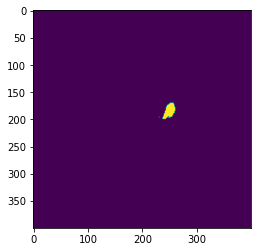

======> predicted mask of 134.png saved! (Counting [209]/424)


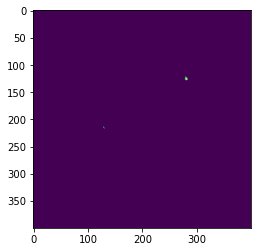

======> predicted mask of 275.png saved! (Counting [210]/424)


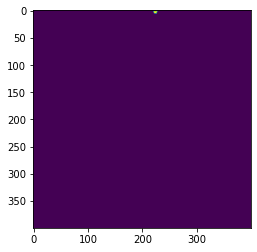

======> predicted mask of 201.png saved! (Counting [211]/424)


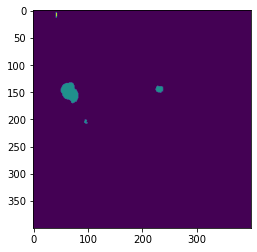

======> predicted mask of 31.png saved! (Counting [212]/424)


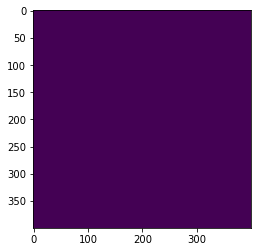

======> predicted mask of 239.png saved! (Counting [213]/424)


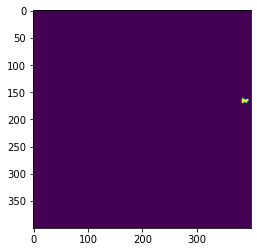

======> predicted mask of 412.png saved! (Counting [214]/424)


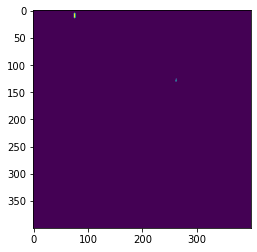

======> predicted mask of 284.png saved! (Counting [215]/424)


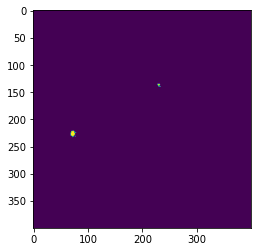

======> predicted mask of 294.png saved! (Counting [216]/424)


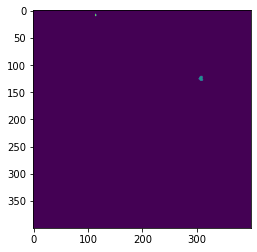

======> predicted mask of 386.png saved! (Counting [217]/424)


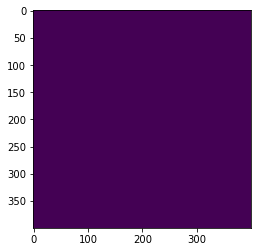

======> predicted mask of 172.png saved! (Counting [218]/424)


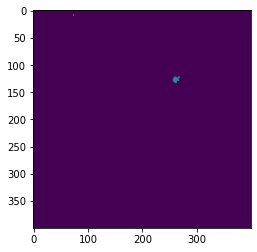

======> predicted mask of 376.png saved! (Counting [219]/424)


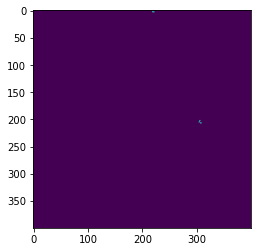

======> predicted mask of 202.png saved! (Counting [220]/424)


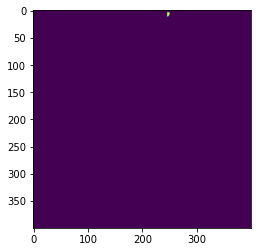

======> predicted mask of 166.png saved! (Counting [221]/424)


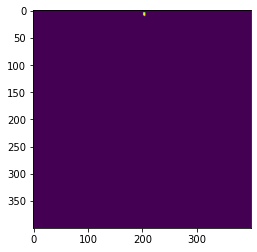

======> predicted mask of 5.png saved! (Counting [222]/424)


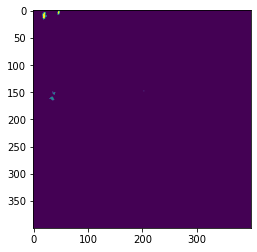

======> predicted mask of 36.png saved! (Counting [223]/424)


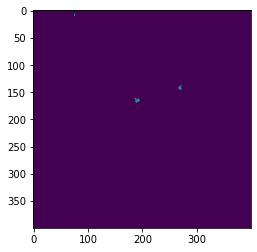

======> predicted mask of 119.png saved! (Counting [224]/424)


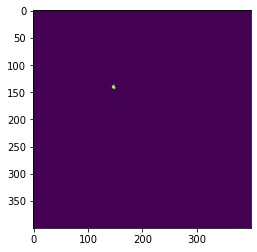

======> predicted mask of 357.png saved! (Counting [225]/424)


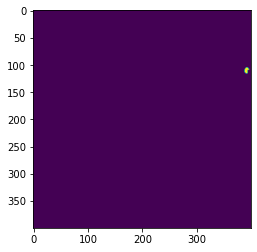

======> predicted mask of 226.png saved! (Counting [226]/424)


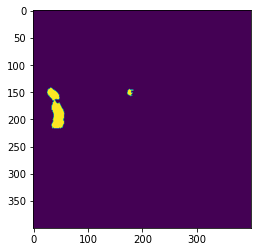

======> predicted mask of 42.png saved! (Counting [227]/424)


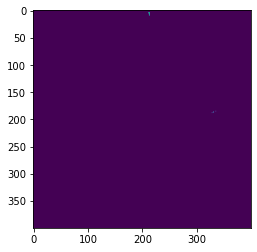

======> predicted mask of 154.png saved! (Counting [228]/424)


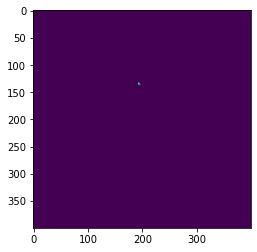

======> predicted mask of 365.png saved! (Counting [229]/424)


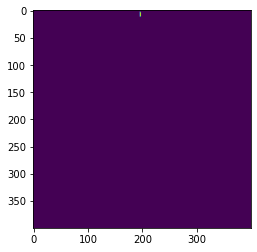

======> predicted mask of 149.png saved! (Counting [230]/424)


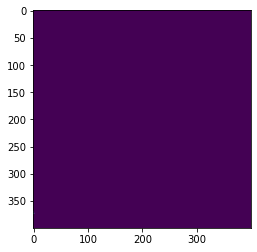

======> predicted mask of 423.png saved! (Counting [231]/424)


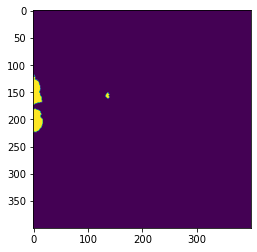

======> predicted mask of 50.png saved! (Counting [232]/424)


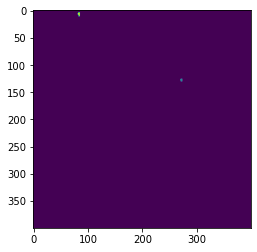

======> predicted mask of 280.png saved! (Counting [233]/424)


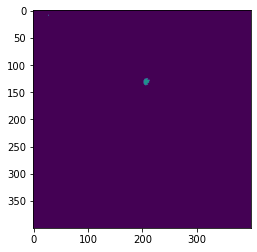

======> predicted mask of 367.png saved! (Counting [234]/424)


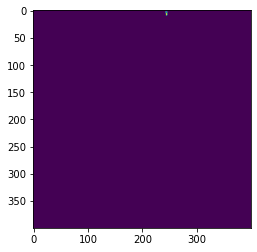

======> predicted mask of 189.png saved! (Counting [235]/424)


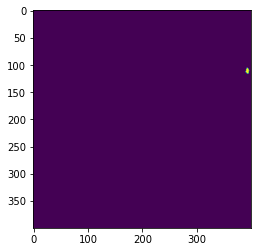

======> predicted mask of 224.png saved! (Counting [236]/424)


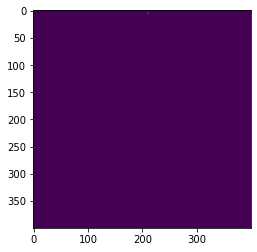

======> predicted mask of 207.png saved! (Counting [237]/424)


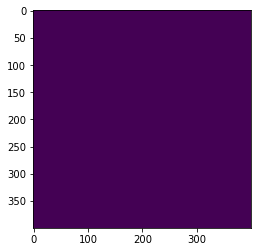

======> predicted mask of 256.png saved! (Counting [238]/424)


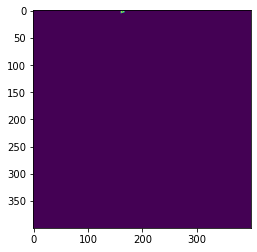

======> predicted mask of 237.png saved! (Counting [239]/424)


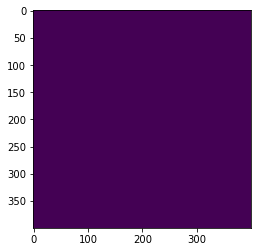

======> predicted mask of 361.png saved! (Counting [240]/424)


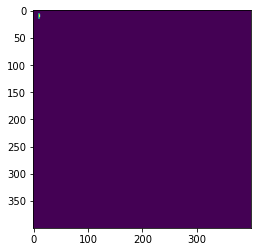

======> predicted mask of 39.png saved! (Counting [241]/424)


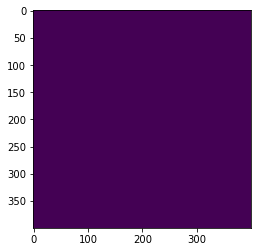

======> predicted mask of 212.png saved! (Counting [242]/424)


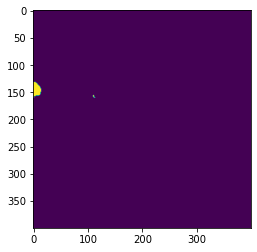

======> predicted mask of 55.png saved! (Counting [243]/424)


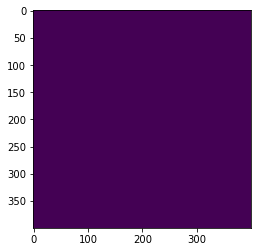

======> predicted mask of 145.png saved! (Counting [244]/424)


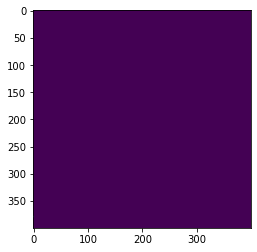

======> predicted mask of 411.png saved! (Counting [245]/424)


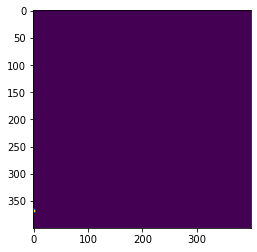

======> predicted mask of 418.png saved! (Counting [246]/424)


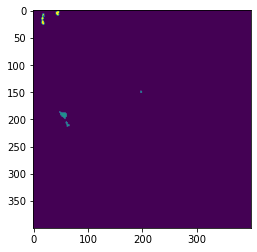

======> predicted mask of 37.png saved! (Counting [247]/424)


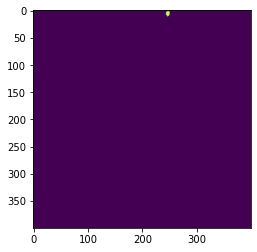

======> predicted mask of 187.png saved! (Counting [248]/424)


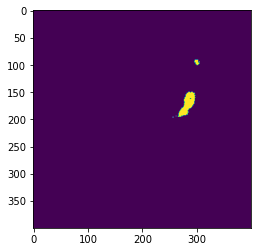

======> predicted mask of 139.png saved! (Counting [249]/424)


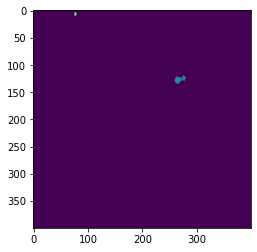

======> predicted mask of 283.png saved! (Counting [250]/424)


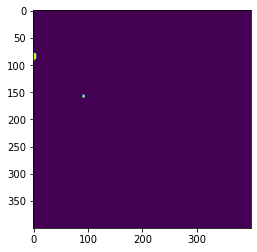

======> predicted mask of 70.png saved! (Counting [251]/424)


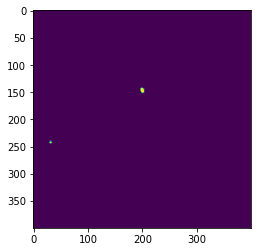

======> predicted mask of 99.png saved! (Counting [252]/424)


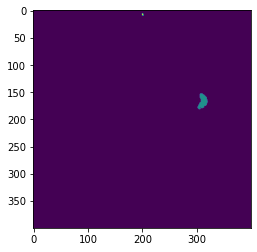

======> predicted mask of 6.png saved! (Counting [253]/424)


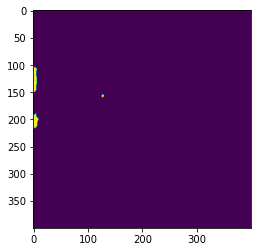

======> predicted mask of 51.png saved! (Counting [254]/424)


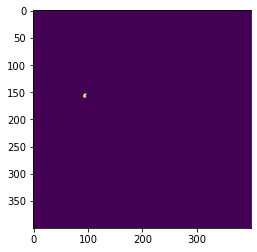

======> predicted mask of 65.png saved! (Counting [255]/424)


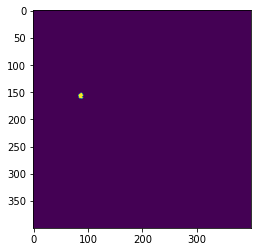

======> predicted mask of 329.png saved! (Counting [256]/424)


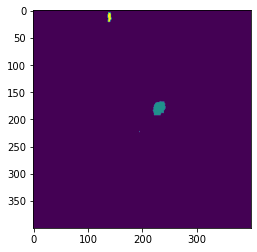

======> predicted mask of 17.png saved! (Counting [257]/424)


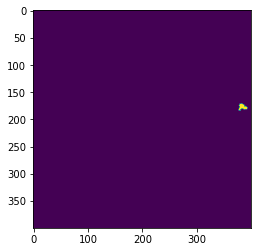

======> predicted mask of 171.png saved! (Counting [258]/424)


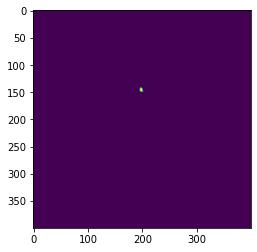

======> predicted mask of 306.png saved! (Counting [259]/424)


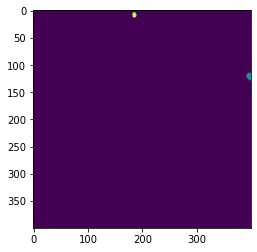

======> predicted mask of 9.png saved! (Counting [260]/424)


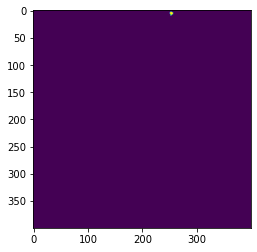

======> predicted mask of 180.png saved! (Counting [261]/424)


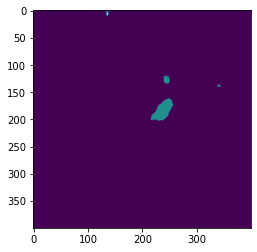

======> predicted mask of 133.png saved! (Counting [262]/424)


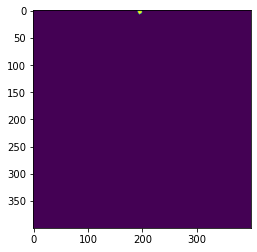

======> predicted mask of 217.png saved! (Counting [263]/424)


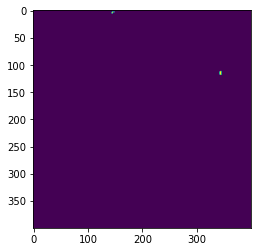

======> predicted mask of 247.png saved! (Counting [264]/424)


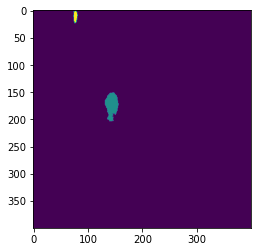

======> predicted mask of 26.png saved! (Counting [265]/424)


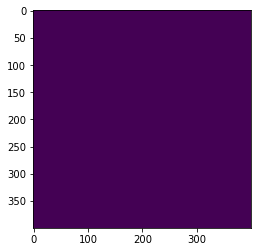

======> predicted mask of 64.png saved! (Counting [266]/424)


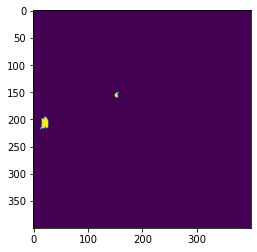

======> predicted mask of 47.png saved! (Counting [267]/424)


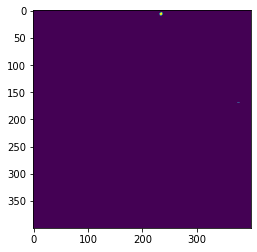

======> predicted mask of 161.png saved! (Counting [268]/424)


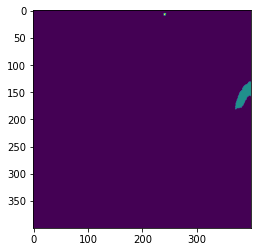

======> predicted mask of 164.png saved! (Counting [269]/424)


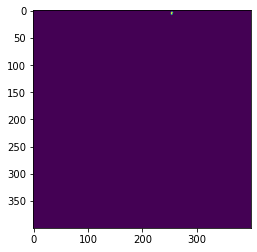

======> predicted mask of 179.png saved! (Counting [270]/424)


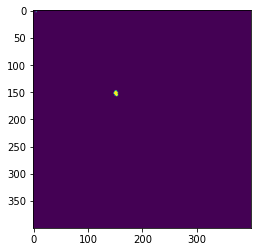

======> predicted mask of 87.png saved! (Counting [271]/424)


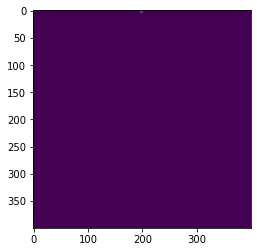

======> predicted mask of 215.png saved! (Counting [272]/424)


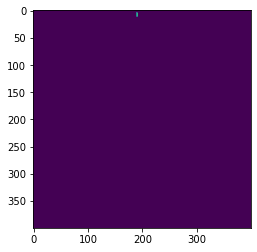

======> predicted mask of 147.png saved! (Counting [273]/424)


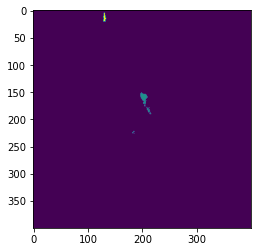

======> predicted mask of 18.png saved! (Counting [274]/424)


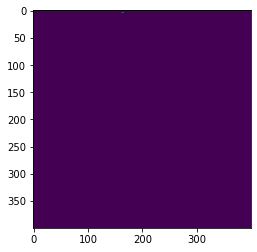

======> predicted mask of 236.png saved! (Counting [275]/424)


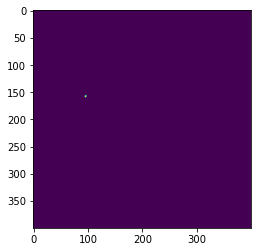

======> predicted mask of 74.png saved! (Counting [276]/424)


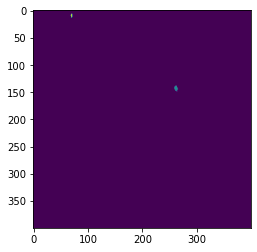

======> predicted mask of 117.png saved! (Counting [277]/424)


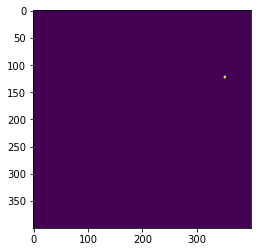

======> predicted mask of 391.png saved! (Counting [278]/424)


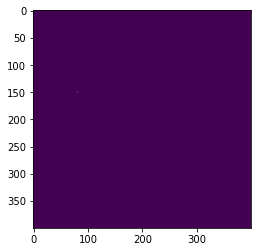

======> predicted mask of 345.png saved! (Counting [279]/424)


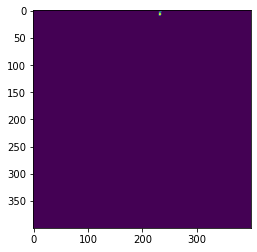

======> predicted mask of 196.png saved! (Counting [280]/424)


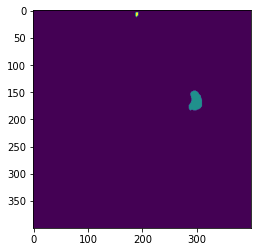

======> predicted mask of 8.png saved! (Counting [281]/424)


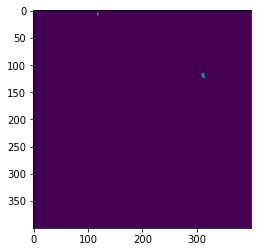

======> predicted mask of 261.png saved! (Counting [282]/424)


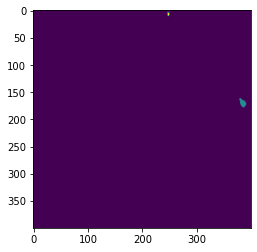

======> predicted mask of 167.png saved! (Counting [283]/424)


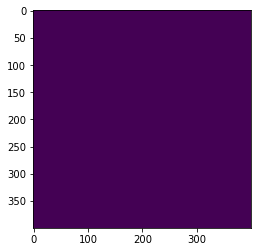

======> predicted mask of 325.png saved! (Counting [284]/424)


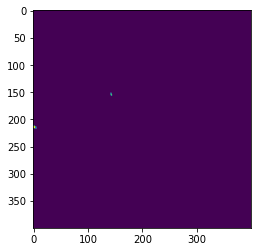

======> predicted mask of 315.png saved! (Counting [285]/424)


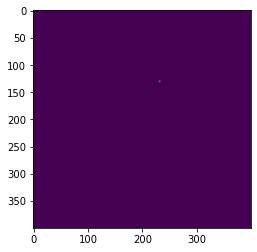

======> predicted mask of 371.png saved! (Counting [286]/424)


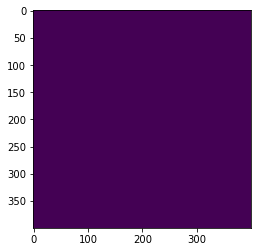

======> predicted mask of 346.png saved! (Counting [287]/424)


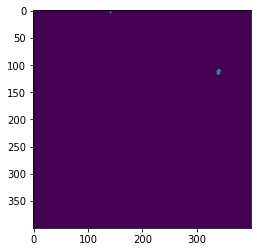

======> predicted mask of 249.png saved! (Counting [288]/424)


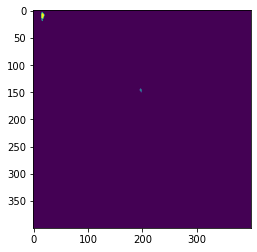

======> predicted mask of 98.png saved! (Counting [289]/424)


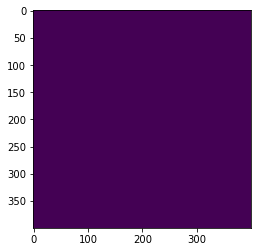

======> predicted mask of 331.png saved! (Counting [290]/424)


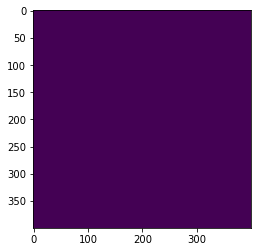

======> predicted mask of 338.png saved! (Counting [291]/424)


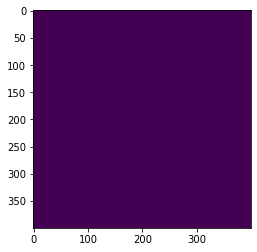

======> predicted mask of 414.png saved! (Counting [292]/424)


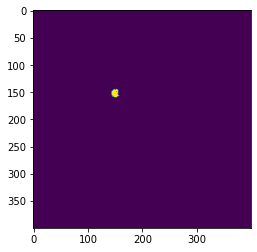

======> predicted mask of 86.png saved! (Counting [293]/424)


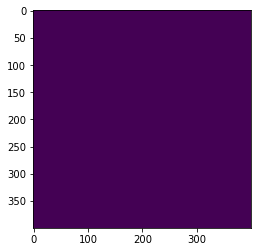

======> predicted mask of 364.png saved! (Counting [294]/424)


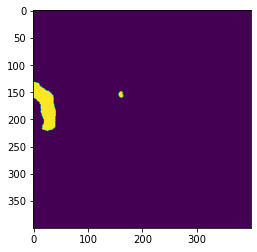

======> predicted mask of 46.png saved! (Counting [295]/424)


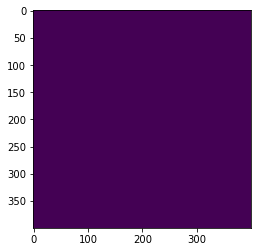

======> predicted mask of 61.png saved! (Counting [296]/424)


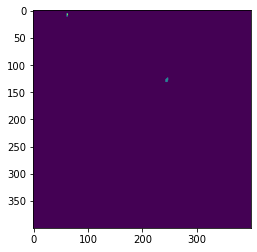

======> predicted mask of 373.png saved! (Counting [297]/424)


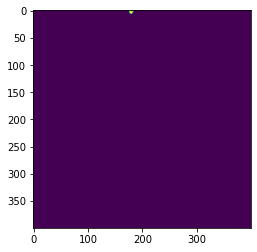

======> predicted mask of 229.png saved! (Counting [298]/424)


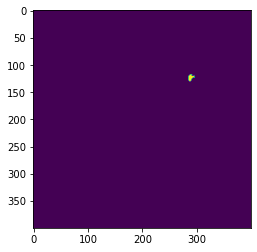

======> predicted mask of 383.png saved! (Counting [299]/424)


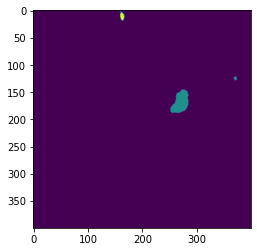

======> predicted mask of 13.png saved! (Counting [300]/424)


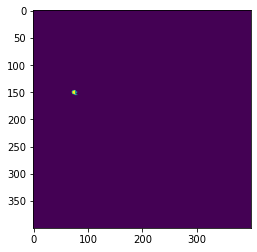

======> predicted mask of 344.png saved! (Counting [301]/424)


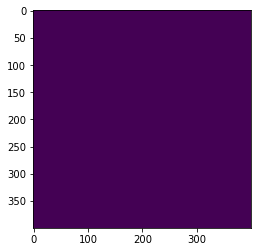

======> predicted mask of 63.png saved! (Counting [302]/424)


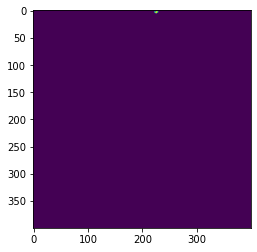

======> predicted mask of 200.png saved! (Counting [303]/424)


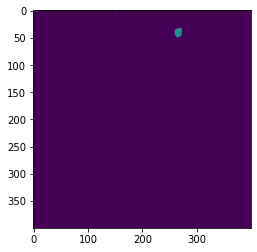

======> predicted mask of 137.png saved! (Counting [304]/424)


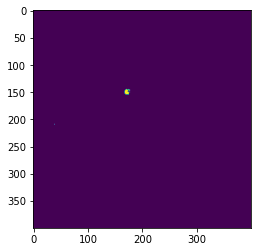

======> predicted mask of 90.png saved! (Counting [305]/424)


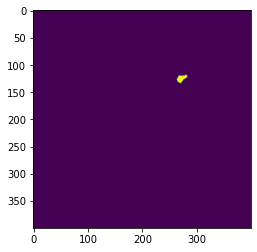

======> predicted mask of 378.png saved! (Counting [306]/424)


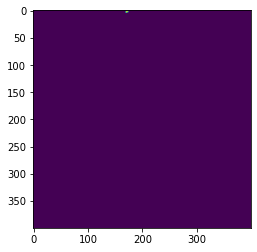

======> predicted mask of 233.png saved! (Counting [307]/424)


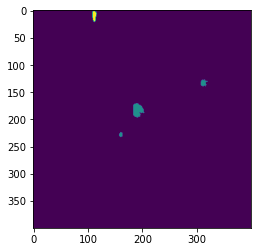

======> predicted mask of 20.png saved! (Counting [308]/424)


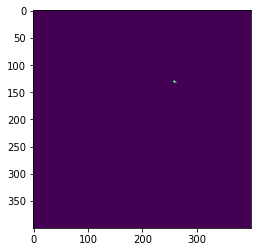

======> predicted mask of 286.png saved! (Counting [309]/424)


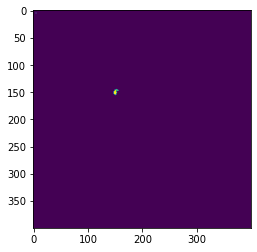

======> predicted mask of 314.png saved! (Counting [310]/424)


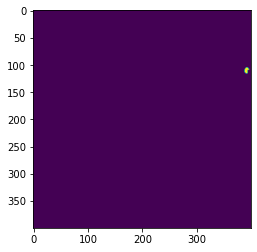

======> predicted mask of 225.png saved! (Counting [311]/424)


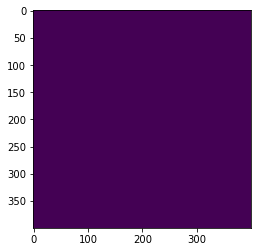

======> predicted mask of 73.png saved! (Counting [312]/424)


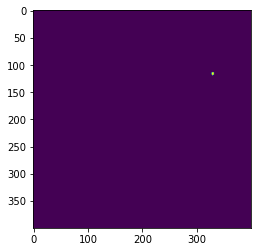

======> predicted mask of 253.png saved! (Counting [313]/424)


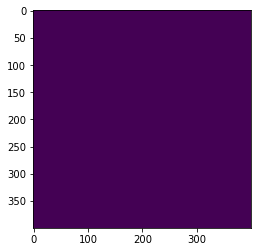

======> predicted mask of 326.png saved! (Counting [314]/424)


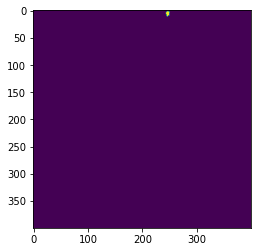

======> predicted mask of 188.png saved! (Counting [315]/424)


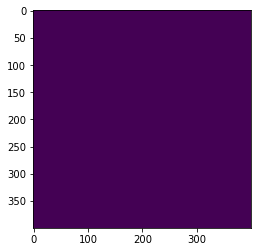

======> predicted mask of 323.png saved! (Counting [316]/424)


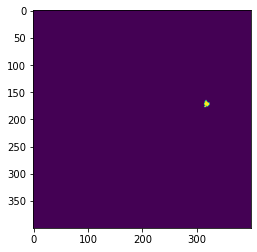

======> predicted mask of 400.png saved! (Counting [317]/424)


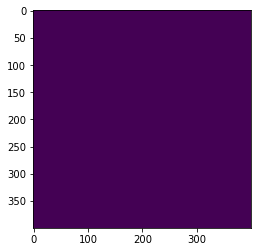

======> predicted mask of 303.png saved! (Counting [318]/424)


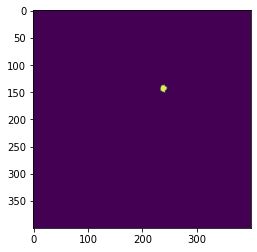

======> predicted mask of 111.png saved! (Counting [319]/424)


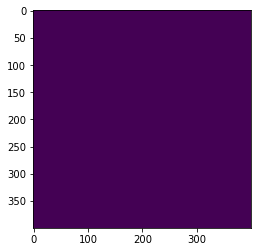

======> predicted mask of 210.png saved! (Counting [320]/424)


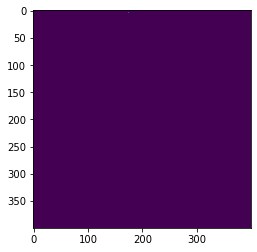

======> predicted mask of 231.png saved! (Counting [321]/424)


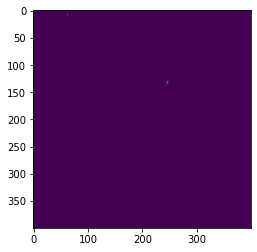

======> predicted mask of 289.png saved! (Counting [322]/424)


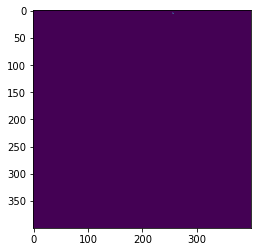

======> predicted mask of 170.png saved! (Counting [323]/424)


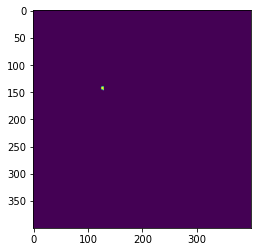

======> predicted mask of 354.png saved! (Counting [324]/424)


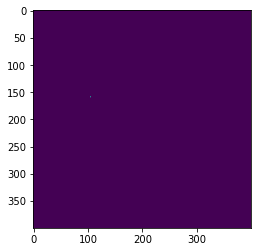

======> predicted mask of 79.png saved! (Counting [325]/424)


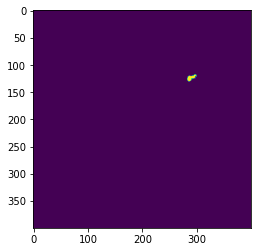

======> predicted mask of 382.png saved! (Counting [326]/424)


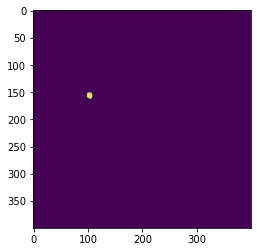

======> predicted mask of 77.png saved! (Counting [327]/424)


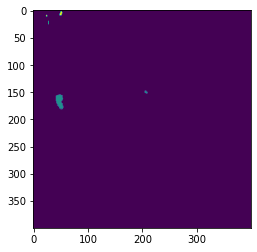

======> predicted mask of 35.png saved! (Counting [328]/424)


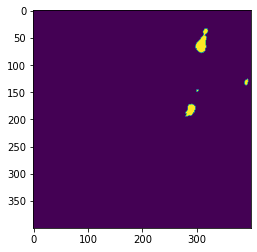

======> predicted mask of 143.png saved! (Counting [329]/424)


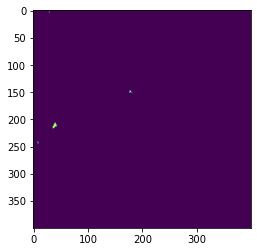

======> predicted mask of 309.png saved! (Counting [330]/424)


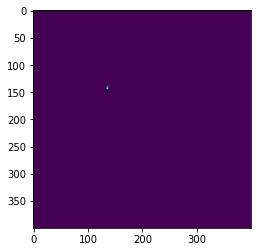

======> predicted mask of 356.png saved! (Counting [331]/424)


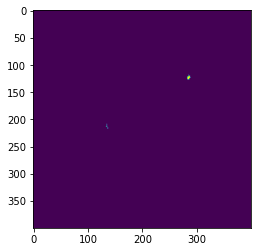

======> predicted mask of 273.png saved! (Counting [332]/424)


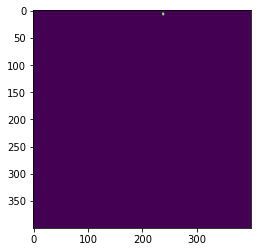

======> predicted mask of 194.png saved! (Counting [333]/424)


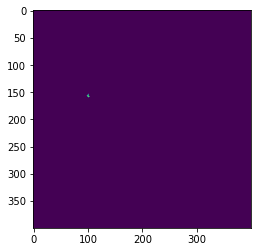

======> predicted mask of 58.png saved! (Counting [334]/424)


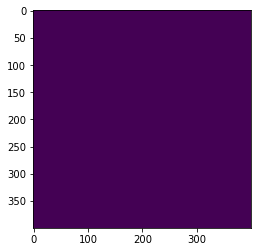

======> predicted mask of 75.png saved! (Counting [335]/424)


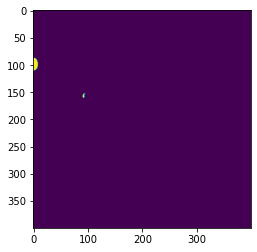

======> predicted mask of 69.png saved! (Counting [336]/424)


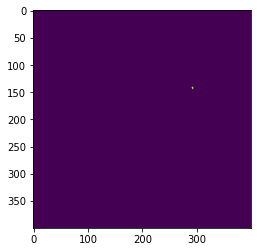

======> predicted mask of 124.png saved! (Counting [337]/424)


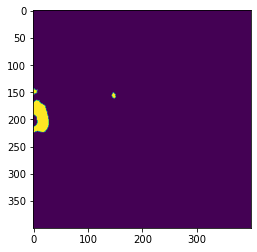

======> predicted mask of 48.png saved! (Counting [338]/424)


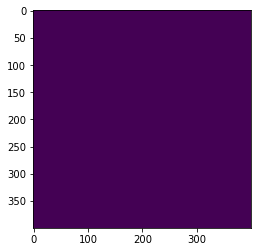

======> predicted mask of 313.png saved! (Counting [339]/424)


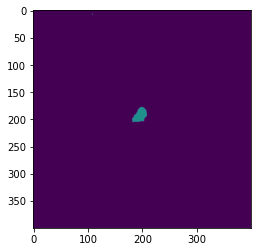

======> predicted mask of 127.png saved! (Counting [340]/424)


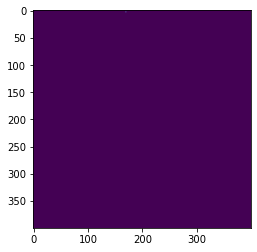

======> predicted mask of 235.png saved! (Counting [341]/424)


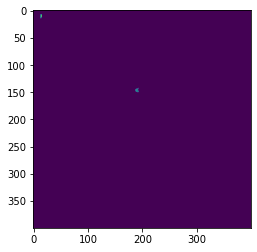

======> predicted mask of 307.png saved! (Counting [342]/424)


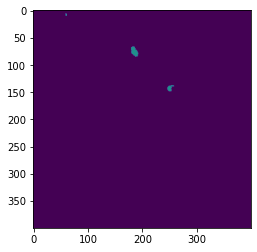

======> predicted mask of 114.png saved! (Counting [343]/424)


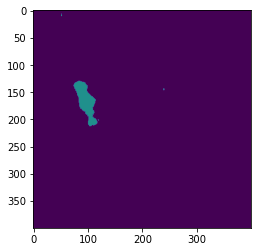

======> predicted mask of 29.png saved! (Counting [344]/424)


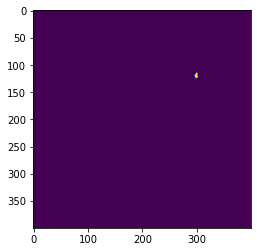

======> predicted mask of 267.png saved! (Counting [345]/424)


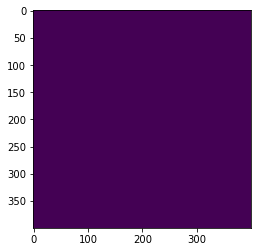

======> predicted mask of 150.png saved! (Counting [346]/424)


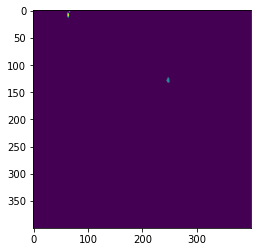

======> predicted mask of 374.png saved! (Counting [347]/424)


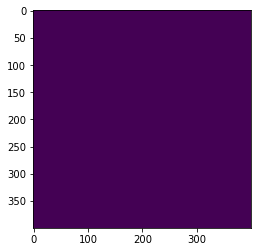

======> predicted mask of 238.png saved! (Counting [348]/424)


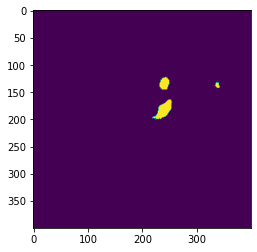

======> predicted mask of 132.png saved! (Counting [349]/424)


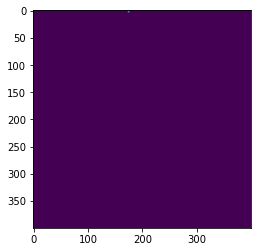

======> predicted mask of 232.png saved! (Counting [350]/424)


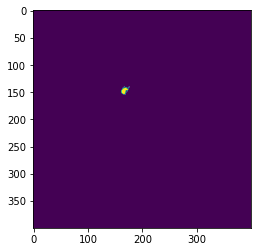

======> predicted mask of 311.png saved! (Counting [351]/424)


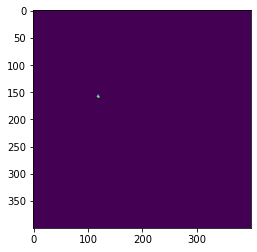

======> predicted mask of 322.png saved! (Counting [352]/424)


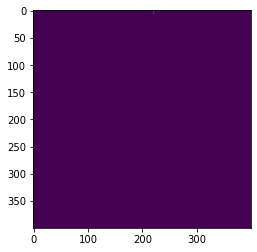

======> predicted mask of 203.png saved! (Counting [353]/424)


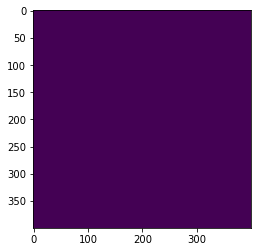

======> predicted mask of 234.png saved! (Counting [354]/424)


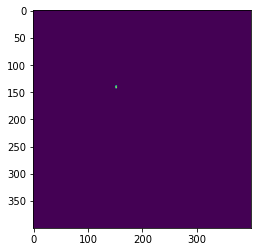

======> predicted mask of 358.png saved! (Counting [355]/424)


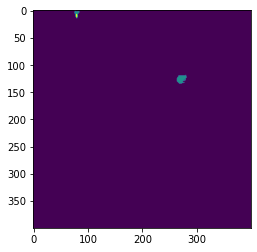

======> predicted mask of 282.png saved! (Counting [356]/424)


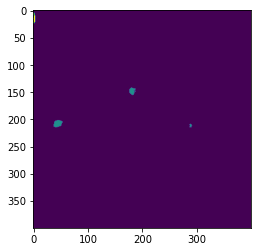

======> predicted mask of 92.png saved! (Counting [357]/424)


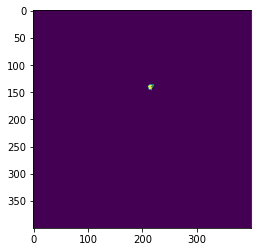

======> predicted mask of 301.png saved! (Counting [358]/424)


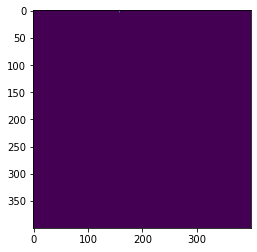

======> predicted mask of 242.png saved! (Counting [359]/424)


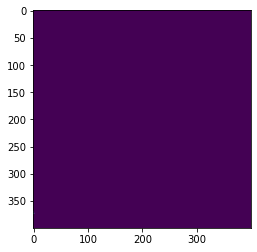

======> predicted mask of 422.png saved! (Counting [360]/424)


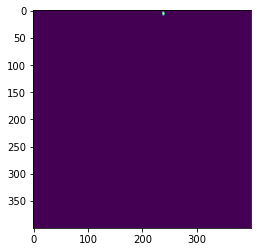

======> predicted mask of 193.png saved! (Counting [361]/424)


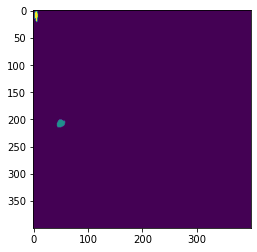

======> predicted mask of 94.png saved! (Counting [362]/424)


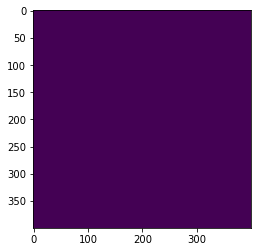

======> predicted mask of 347.png saved! (Counting [363]/424)


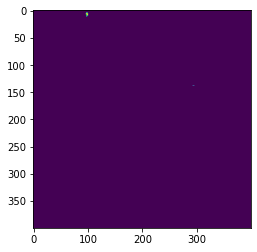

======> predicted mask of 23.png saved! (Counting [364]/424)


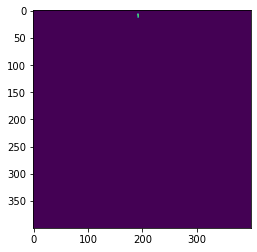

======> predicted mask of 148.png saved! (Counting [365]/424)


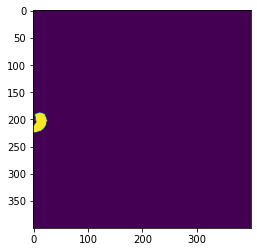

======> predicted mask of 49.png saved! (Counting [366]/424)


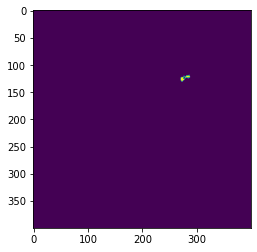

======> predicted mask of 279.png saved! (Counting [367]/424)


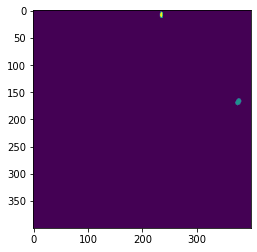

======> predicted mask of 162.png saved! (Counting [368]/424)


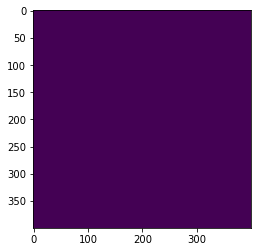

======> predicted mask of 408.png saved! (Counting [369]/424)


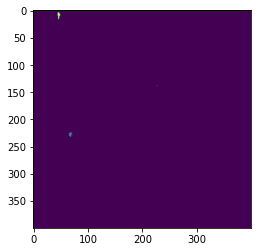

======> predicted mask of 295.png saved! (Counting [370]/424)


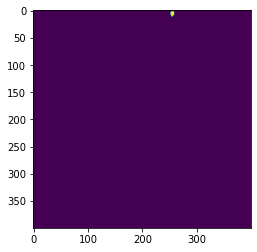

======> predicted mask of 177.png saved! (Counting [371]/424)


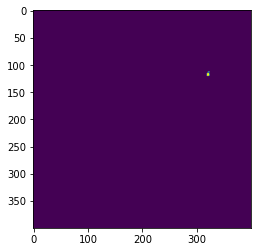

======> predicted mask of 257.png saved! (Counting [372]/424)


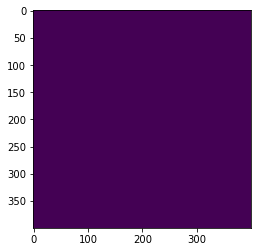

======> predicted mask of 272.png saved! (Counting [373]/424)


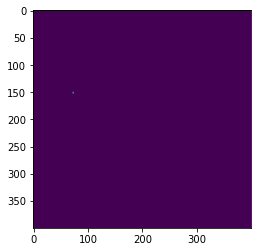

======> predicted mask of 343.png saved! (Counting [374]/424)


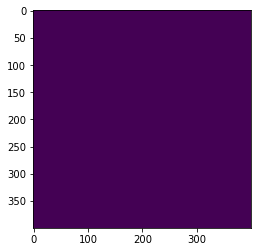

======> predicted mask of 351.png saved! (Counting [375]/424)


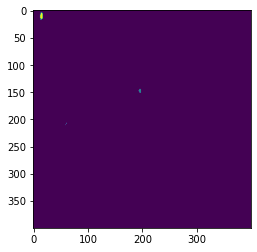

======> predicted mask of 97.png saved! (Counting [376]/424)


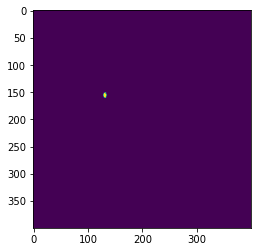

======> predicted mask of 319.png saved! (Counting [377]/424)


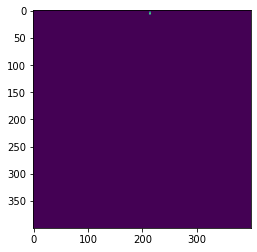

======> predicted mask of 205.png saved! (Counting [378]/424)


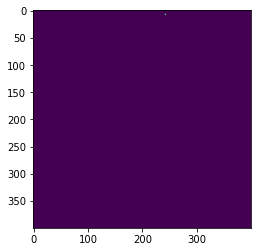

======> predicted mask of 191.png saved! (Counting [379]/424)


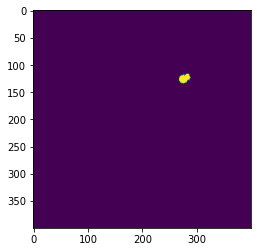

======> predicted mask of 379.png saved! (Counting [380]/424)


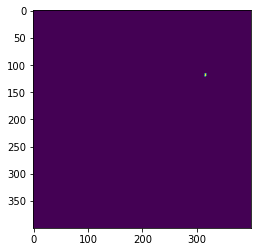

======> predicted mask of 259.png saved! (Counting [381]/424)


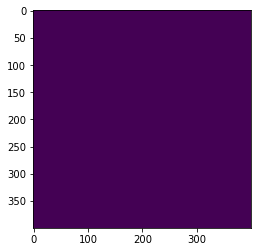

======> predicted mask of 204.png saved! (Counting [382]/424)


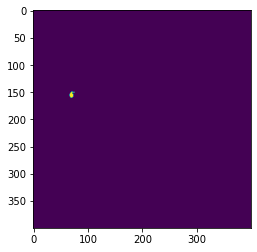

======> predicted mask of 332.png saved! (Counting [383]/424)


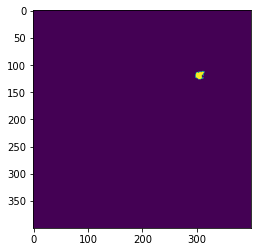

======> predicted mask of 266.png saved! (Counting [384]/424)


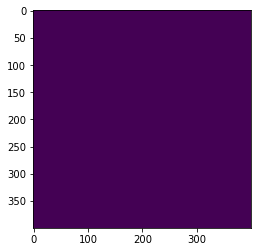

======> predicted mask of 336.png saved! (Counting [385]/424)


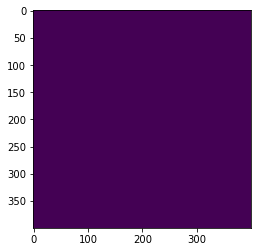

======> predicted mask of 252.png saved! (Counting [386]/424)


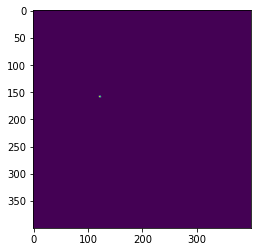

======> predicted mask of 52.png saved! (Counting [387]/424)


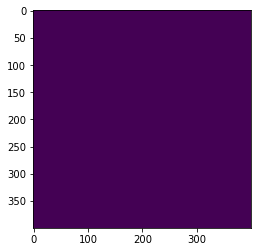

======> predicted mask of 254.png saved! (Counting [388]/424)


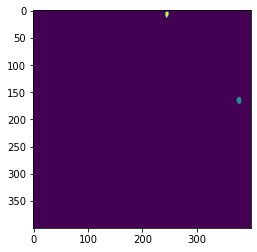

======> predicted mask of 165.png saved! (Counting [389]/424)


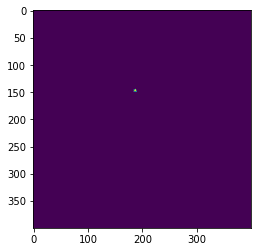

======> predicted mask of 308.png saved! (Counting [390]/424)


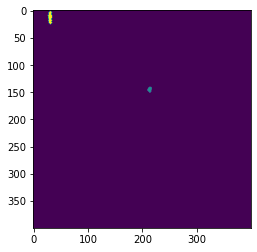

======> predicted mask of 104.png saved! (Counting [391]/424)


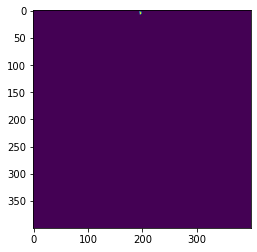

======> predicted mask of 216.png saved! (Counting [392]/424)


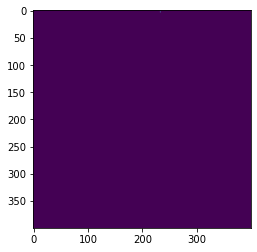

======> predicted mask of 403.png saved! (Counting [393]/424)


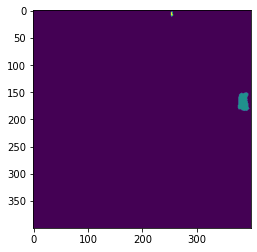

======> predicted mask of 168.png saved! (Counting [394]/424)


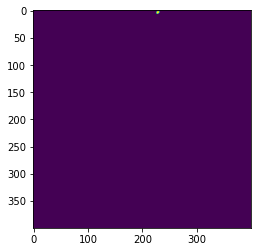

======> predicted mask of 199.png saved! (Counting [395]/424)


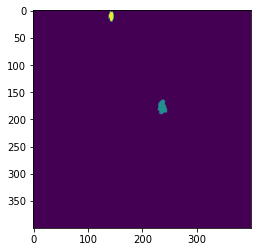

======> predicted mask of 16.png saved! (Counting [396]/424)


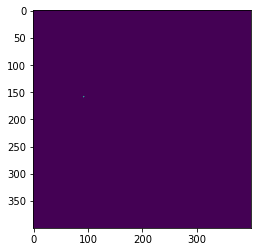

======> predicted mask of 72.png saved! (Counting [397]/424)


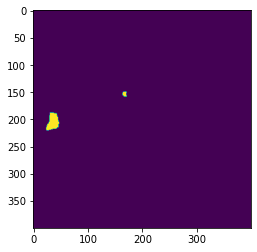

======> predicted mask of 44.png saved! (Counting [398]/424)


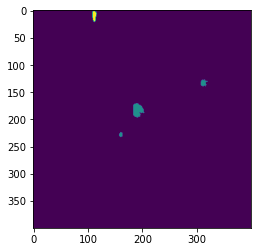

======> predicted mask of 21.png saved! (Counting [399]/424)


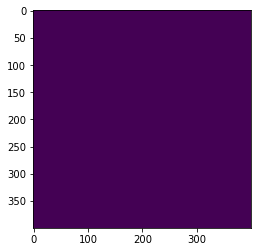

======> predicted mask of 349.png saved! (Counting [400]/424)


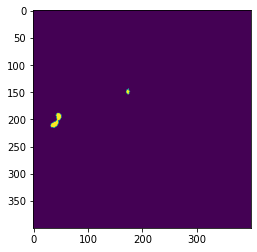

======> predicted mask of 91.png saved! (Counting [401]/424)


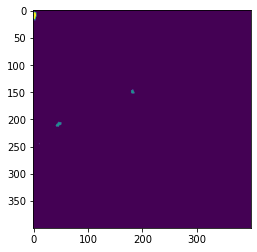

======> predicted mask of 93.png saved! (Counting [402]/424)


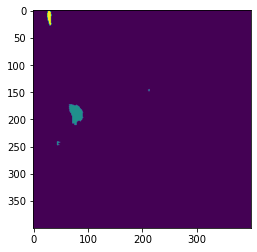

======> predicted mask of 34.png saved! (Counting [403]/424)


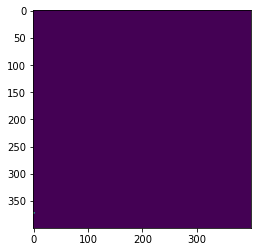

======> predicted mask of 413.png saved! (Counting [404]/424)


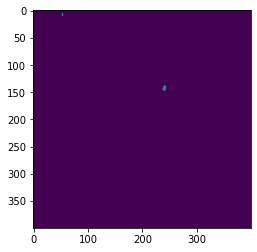

======> predicted mask of 112.png saved! (Counting [405]/424)


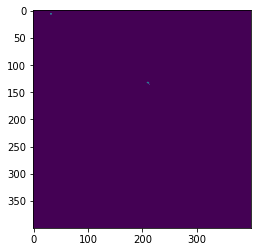

======> predicted mask of 368.png saved! (Counting [406]/424)


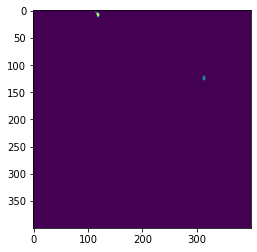

======> predicted mask of 387.png saved! (Counting [407]/424)


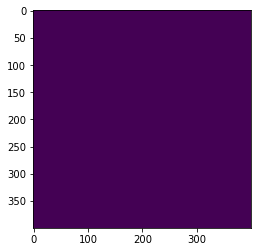

======> predicted mask of 80.png saved! (Counting [408]/424)


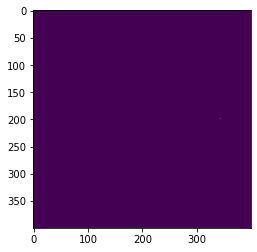

======> predicted mask of 405.png saved! (Counting [409]/424)


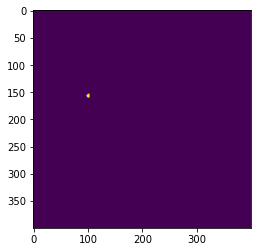

======> predicted mask of 59.png saved! (Counting [410]/424)


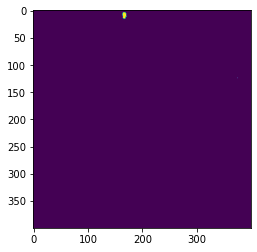

======> predicted mask of 12.png saved! (Counting [411]/424)


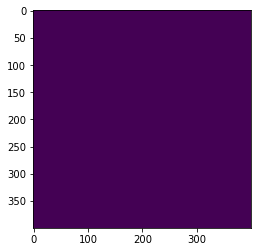

======> predicted mask of 219.png saved! (Counting [412]/424)


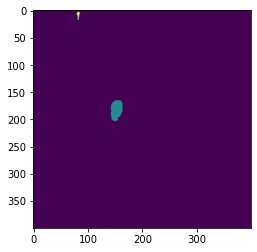

======> predicted mask of 25.png saved! (Counting [413]/424)


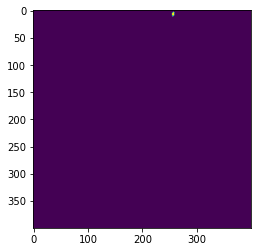

======> predicted mask of 173.png saved! (Counting [414]/424)


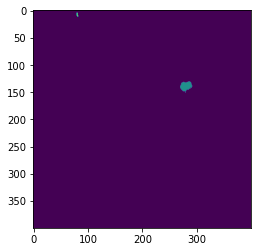

======> predicted mask of 120.png saved! (Counting [415]/424)


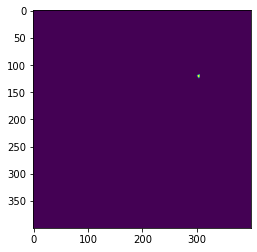

======> predicted mask of 265.png saved! (Counting [416]/424)


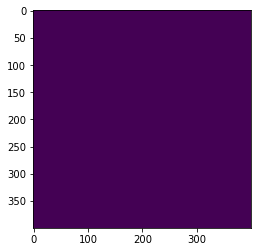

======> predicted mask of 341.png saved! (Counting [417]/424)


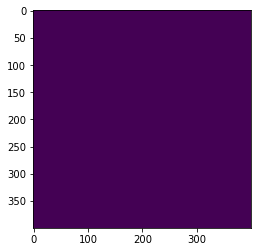

======> predicted mask of 213.png saved! (Counting [418]/424)


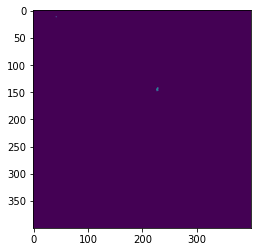

======> predicted mask of 107.png saved! (Counting [419]/424)


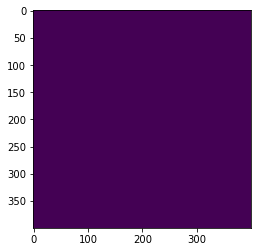

======> predicted mask of 208.png saved! (Counting [420]/424)


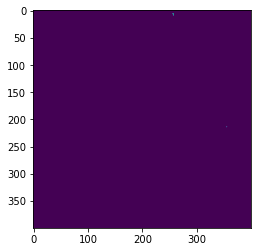

======> predicted mask of 174.png saved! (Counting [421]/424)


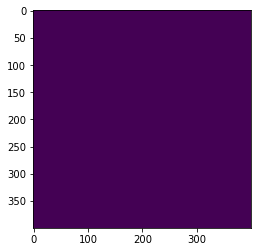

======> predicted mask of 153.png saved! (Counting [422]/424)


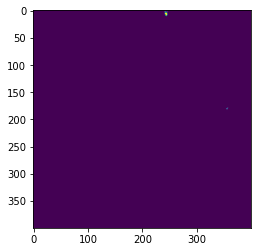

======> predicted mask of 190.png saved! (Counting [423]/424)


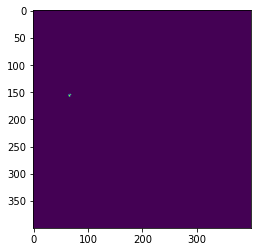

======> predicted mask of 335.png saved! (Counting [424]/424)

======> Mission accomplished!!!


In [69]:
# process the images one by one with a 'for loop'
from tqdm import tqdm

i = 0
for test_fname in test_fnames:
    # load
    test_pilimgimg = Image.open(test_fname).resize((960, 770))
    test_pilimg = PILImage(test_pilimgimg)

    # predict
    test_pred_torch_all = learn.predict(test_pilimg)
    test_pred_torch= test_pred_torch_all[0]
    plt.imshow(test_pred_torch)
    plt.show()

    # convert
    test_pred_int64 = test_pred_torch.numpy() * 255/2 # torch.int64 --> np.int64
    test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64, order ='C') # np.int64 --> np.float64
    test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert('RGB')
#     test_pred_pil.show()
    # save
    test_pred_pil.save(f'{test_pred_path}/predmask_{test_fname.name}', 'PNG')
    
    # count
    count = []
    i += 1
    count.append(i)
    print(f'======> predicted mask of {test_fname.name} saved! (Counting {count}/{total_number})')
    

print('\n======> Mission accomplished!!!')

In [ ]:
# process the images in smaller size
# get the testing time


now = datetime.now()
date_time = now.strftime('%Y%m%d%H%M') # Y for year, m for month, d for day, H for hour, M for minute, S for second
print(f'======> The time: {date_time}')

# build the folder to store predicted masks


test_pred_path = pathlib.Path(f"/home/qiaolinhan/dev/giao/datasets/bounding/pred_{date_time}" )
test_pred_path.mkdir(parents=True, exist_ok=True)

print(f'======> created the folder: {test_pred_path}')

i = 0
for test_fname in test_fnames:
    # load
    test_pilimgimg = Image.open(test_fname).resize((960, 770))
    test_pilimg = PILImage(test_pilimgimg)

    # predict
    test_pred_torch_all = learn.predict(test_pilimg)
    test_pred_torch= test_pred_torch_all[0]
    plt.imshow(test_pred_torch)
    plt.show()

    # convert
    test_pred_int64 = test_pred_torch[i].numpy() * 255/2 # torch.int64 --> np.int64
    test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64, order ='C') # np.int64 --> np.float64
    test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert('RGB')
#     test_pred_pil.show()
    # save
    test_pred_pil.save(f'{test_pred_path}/predmask_{test_fname.name}', 'PNG')
    
    # count
    count = []
    i += 1
    count.append(i)
    print(f'======> predicted mask of {test_fname.name} saved! (Counting {count}/{total_number})')
    

print('\n======> Mission accomplished!!!')
